# Team Project - Kickstarter Project

* Author: Julia Hammerer, Vanessa Mai
* Last Update: 15.06.2018



## Project Description
In this project we will look at a list of Crowdfunding Projects pulled from the Kickstarter website in 2018. Analysis will be mainly Data Explorations on the Project and may include (but not exclusively)
* compare successful and failed projects per country, and category
* look at size/funding amount of projects
* what's the value of successful projects, are there differences to failed ones?
* time series analysis 
* how much do people donate to projects in average

Here we will import all packages required for our analysis

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import pandas_profiling
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from pandas.tools.plotting import autocorrelation_plot


## First Look on the data and data cleansing

Then first of all we import our csv file as a pandas dataframe


In [2]:
ks_raw=pd.read_csv("ks-projects-201801.csv")

In [3]:
ks_raw

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


When looking at the data we see that there are several fields with amounts (=pledged). The fields "pledged" and "goal" are in the original currency. There is also "usd pledged", usd_pledged_real", "uds_goal_real". "usd pledged" is the amount converted to us-dollar by Kickstarter. According to the description from Kaggle "usd_pledged_real" and "usd_goal_real" are converted using fixer.io by tonyplaysguitar. 
We'll use these fields, as this also have the "goal" in US-Dollars and we remove the other columns


In [4]:
# remove unused columns, we don't need name and id, and the mentioned amounts
# we also do not need currency, as we have everything in US-Dollar
ks=ks_raw.drop(["ID", "goal", "pledged", "usd pledged", "currency"], axis=1)

# we take a look at the datatypes, to look if we need to convert any fields to the appropriate data type
ks.dtypes 

name                 object
category             object
main_category        object
deadline             object
launched             object
state                object
backers               int64
country              object
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

We see that all the fields, that we need in a numeric form, are already automatically detected by python as numeric. 
However, to use the dates correctly, we need to convert launched and deadline into a datetime-datatype

In [5]:
ks["launched"] = pd.to_datetime(ks["launched"], infer_datetime_format=True)
ks["deadline"] = pd.to_datetime(ks["deadline"], infer_datetime_format=True)

In [6]:
# check for open projects
closed=ks["deadline"]>ks["launched"]
closed.value_counts()

True    378661
dtype: int64

We see that we only have closed projects here. As a prospect, we could include open projects and do a prediction on whether a project will be successful or not. Next step is to look at the data more closely and see some basic information on the data. For this we use the package pandas-profiling. See documenation [here](https://github.com/pandas-profiling/pandas-profiling)


In [7]:
#pandas_profiling.ProfileReport(ks)

In [8]:
# We also look at some other descriptive statistics
ks.describe()

,backers,usd_pledged_real,usd_goal_real
count,378661.000000,3.786610e+05,3.786610e+05
mean,105.617476,9.058924e+03,4.545440e+04
std,907.185035,9.097334e+04,1.152950e+06
min,0.000000,0.000000e+00,1.000000e-02
25%,2.000000,3.100000e+01,2.000000e+03
50%,12.000000,6.243300e+02,5.500000e+03
75%,56.000000,4.050000e+03,1.550000e+04
max,219382.000000,2.033899e+07,1.663614e+08


So we have a basic summary first. The data seems to be complete, there are no missing values, so we do not have to deal with that. However, if we look closely at **"launched"**, which is the launch-day of a product, we can see that there are some in 1970. These might be missing values, so we have to think about what to do with that. As we have plenty records (~380 000) and the number of those observations are relatively low, it is enough if we just remove those observations

Another thing is, that the cardinality of **"category"** is very high, meaning there are many different values. If in the end, the number of observations per category is too small, it might not make much sense to explore them further. We will elaborate on that later more closely.

The **countries** are only displayed with their country code. We need to convert them to proper country names for better readability, later on also possibly some geocoding, and thus using maps for visualizations and such things. We will also elaborate on that later.

Pandas_Profiling also provides a really quick **Correlation Analysis**. We can see a high positive correlation between backers und pledged amount, which makes perfect sense, so this does not give us particularly interesting information. In fact, it is more interesting to see the average amount that backers give for the projects. Thus, we'll look into this later.

In [9]:
## remove the rows with launched in 1970, as these are default values for missing entries
ks = ks[(ks["launched"].dt.year > 1970)]

We need to map the country code to the proper country names for better readability. Thus, we're using a file that includes the 2-digits code and the country name and we use this for mapping (file found [here](https://datahub.io/core/country-list#resource-data))

In [10]:
# read in a mapping file for countries
country_mapping=pd.read_csv("country.csv")

In [11]:
country_mapping

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
5,Andorra,AD
6,Angola,AO
7,Anguilla,AI
8,Antarctica,AQ
9,Antigua and Barbuda,AG


In [12]:
# we'll do a left outer join, with our Kickstarter-Projectlist being left
ks= pd.merge(ks,country_mapping, how="left", left_on="country", right_on="Code" )

# we can see that the names are now properly written out
# but we'll need to remove the joining columns and rename the Country column from "Name" to "Country"
ks= ks.drop(["country", "Code"], axis=1)
ks=ks.rename(columns={"Name": "Country"})
ks.tail()

,name,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,Country
378649,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,2014-10-17,2014-09-17 02:35:30,canceled,1,25.0,50000.0,United States
378650,The Tribe,Narrative Film,Film & Video,2011-07-19,2011-06-22 03:35:14,failed,5,155.0,1500.0,United States
378651,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,2010-08-16,2010-07-01 19:40:30,failed,1,20.0,15000.0,United States
378652,BioDefense Education Kit,Technology,Technology,2016-02-13,2016-01-13 18:13:53,failed,6,200.0,15000.0,United States
378653,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,2011-08-16,2011-07-19 09:07:47,failed,17,524.0,2000.0,United States


In [13]:
# let's have a look at which countries we have:
print(ks.Country.unique())

['United Kingdom' 'United States' 'Canada' 'Australia' 'Norway' 'Italy'
 'Germany' 'Ireland' 'Mexico' 'Spain' nan 'Sweden' 'France' 'Netherlands'
 'New Zealand' 'Switzerland' 'Austria' 'Denmark' 'Belgium' 'Hong Kong'
 'Luxembourg' 'Singapore' 'Japan']


We can see, that there is also "nan", so we had values which could not be mapped. We also looked into the raw data and saw the value "N,0"". This seems like a data quality issue. We can either remove the data or leave it in with the country value missing. 
We'll look into how many there are, if it is not too much, we can just remove it:

In [14]:
# How many are "missing" in Country
print((ks.Country.isna()).sum())

3797


3797 out of more than 300 000 is not much, so we can remove them without much concern.

In [15]:
# remove of nan rows in Country
ks = ks[(ks["Country"].notna())]

## Feature Engineering

To build a profound analysis, the given attributes are not always ideal and also not enough.
we want to add some more interesting values and also "normalized" values. 
* Duration of the project: How much time between launch-day and deadline in days?
* Ratio of Duration and goal: what would be the goal per day?
* Delta pledged: how much more than the goal has been pledged or how much is missing?
* Average pledged per backer: how much in average do people donate per project?
* pledged rate: How much per day in average?

In [16]:
ks["project_length"]=(ks["deadline"]-ks["launched"])/np.timedelta64(1, 'D')
ks["goal_per_day"]= ks["usd_goal_real"]/ks["project_length"]
ks["pledged_delta"]= ks["usd_pledged_real"]-ks["usd_goal_real"]
ks["pledged_per_backer"]=ks["usd_pledged_real"]/ks["backers"]
ks["pledged_per_day"]= ks["usd_pledged_real"]/ks["project_length"]
ks["backer_per_length"]=ks["backers"]/ks["project_length"]

In [17]:
ks.describe()

,backers,usd_pledged_real,usd_goal_real,project_length,goal_per_day,pledged_delta,pledged_per_backer,pledged_per_day,backer_per_length
count,374857.000000,3.748570e+05,3.748570e+05,374857.000000,3.748570e+05,3.748570e+05,3.230550e+05,374857.000000,374857.000000
mean,106.689268,9.120973e+03,4.586394e+04,33.651436,2.206322e+03,-3.674296e+04,inf,289.619852,3.537438
std,911.713717,9.132006e+04,1.158772e+06,12.814748,4.772008e+05,1.161858e+06,NaN,2808.443610,29.682071
min,0.000000,0.000000e+00,1.000000e-02,0.005058,2.832798e-04,-1.663614e+08,4.500000e-01,0.000000,0.000000
25%,2.000000,3.100000e+01,2.000000e+03,29.098044,6.714354e+01,-1.000000e+04,2.531818e+01,0.995867,0.056115
50%,12.000000,6.246200e+02,5.500000e+03,29.690787,1.747748e+02,-1.980000e+03,4.846795e+01,20.237944,0.388093
75%,57.000000,4.051000e+03,1.600000e+04,36.740370,5.118556e+02,1.995800e+02,8.444444e+01,133.917457,1.905500
max,219382.000000,2.033899e+07,1.663614e+08,91.962650,2.903031e+08,1.983899e+07,inf,648896.545028,7262.353557


In [18]:
ks.head()

,name,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,Country,project_length,goal_per_day,pledged_delta,pledged_per_backer,pledged_per_day,backer_per_length
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95,United Kingdom,58.491343,26.225249,-1533.95,NaN,0.000000,0.000000
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00,United States,59.802813,501.648647,-27579.00,161.400000,40.483046,0.250824
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00,United States,44.985532,1000.321605,-44780.00,73.333333,4.890461,0.066688
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00,United States,29.858206,167.458152,-4999.00,1.000000,0.033492,0.033492
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,1283.0,19500.00,United States,55.642326,350.452637,-18217.00,91.642857,23.057986,0.251607


## Distributions

### Distribution of Project Status
First we take a look at the distribution of the status of the Projects


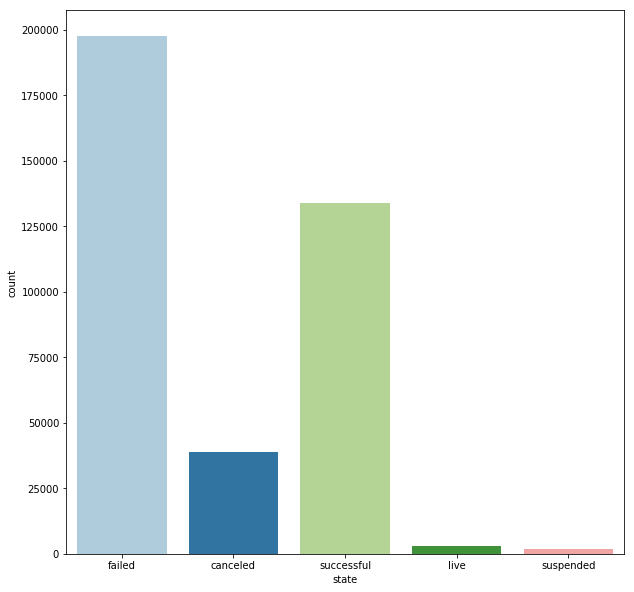

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.countplot(x="state",data=ks, ax=ax,palette="Paired")


In this plot the number of projects and their respective status are displayed.
We can see that most Projects have failed. The values "live", "undefined" and "suspended" have the least values and their status is not clear, there is no proper description on the source of the data (Kaggle) either. So these values will be removed in the next step. We concentrate on the more meaningful values "failed", "canceled" and "successful"
Next we analyse the rate of success.

In [20]:
# Removing Rows
ks= ks[ks.state != "live"]
ks= ks[ks.state != "undefined"]
ks= ks[ks.state != "suspended"]

By looking in the dataset.we can see that canceled projects are stopped by the creator of the project and failed projects have reached the deadline. We combine "canceled" and "failed" because there is not a big difference between them as they are both lost


In [21]:
#Combining Canceled and Failed
ks.state=ks["state"].replace({'canceled':'failed'})
#print(ks.state)

In [22]:
# Success rate
success_rate = (ks.state == 'successful').sum()/len(ks.index)
print('% 6.2f' % success_rate)

  0.36


Rougly 36% of all Projects, this dataset are won. 
As one of the next steps, we try to find out differences between failed and cancelled.

In [23]:
# Failing rate
failing_rate = (ks.state == 'failed').sum()/len(ks.index)
print('% 6.2f' % failing_rate)

  0.64


The rate of failed projects is about 64%

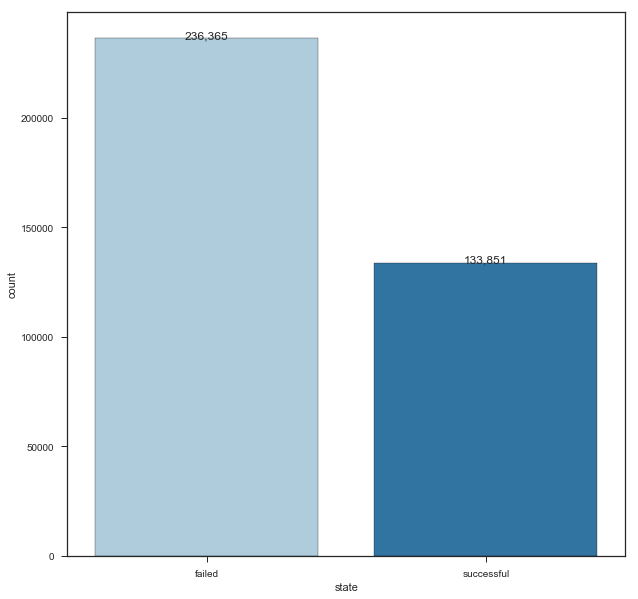

In [89]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax1=sns.countplot(x="state",data=ks, ax=ax,palette="Paired")

for p in ax1.patches:
   height = p.get_height()
   ax.text(p.get_x()+p.get_width()/2.,height ,"{:,}".format(height), ha="center") 

### Distribution of the Main Category

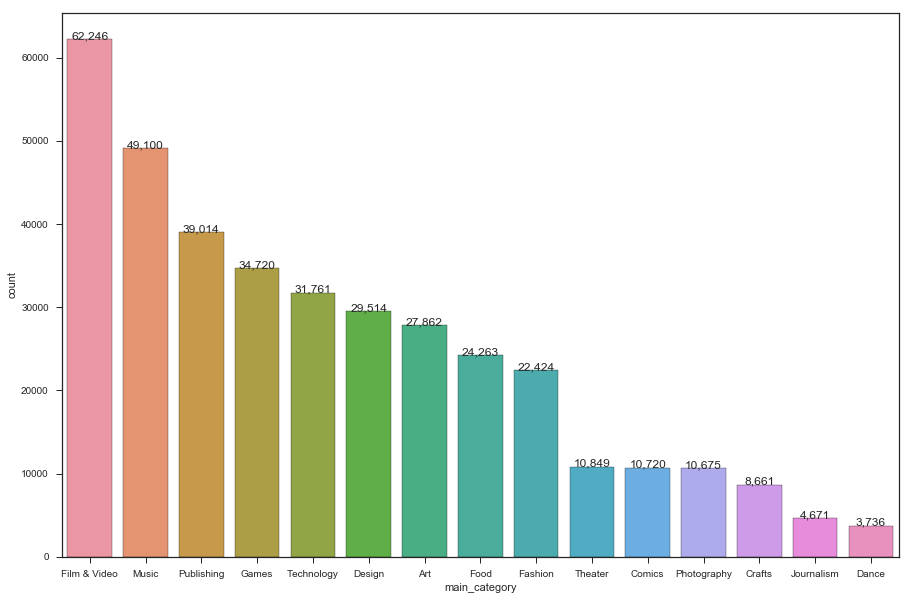

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax2=sns.countplot(x="main_category",data=ks, ax=ax, order = ks['main_category'].value_counts().index)

for p in ax2.patches:
   height = p.get_height()
   ax.text(p.get_x()+p.get_width()/2.,height ,"{:,}".format(height), ha="center") 

We have a deeper look at the distribution of categories and main categories

In [26]:
ks.groupby("main_category")["category"].value_counts()

main_category  category         
Art            Art                  8154
               Painting             3263
               Illustration         3125
               Public Art           3060
               Mixed Media          2734
               Performance Art      2141
               Sculpture            1803
               Digital Art          1329
               Conceptual Art       1016
               Installations         471
               Ceramics              302
               Textiles              274
               Video Art             190
Comics         Comics               4973
               Comic Books          2707
               Graphic Novels       1839
               Webcomics             643
               Anthologies           402
               Events                156
Crafts         Crafts               4603
               Woodworking          1150
               DIY                  1126
               Candles               427
               Printing 

 How is the distribution of failed,canceld or successful Projects in each category?

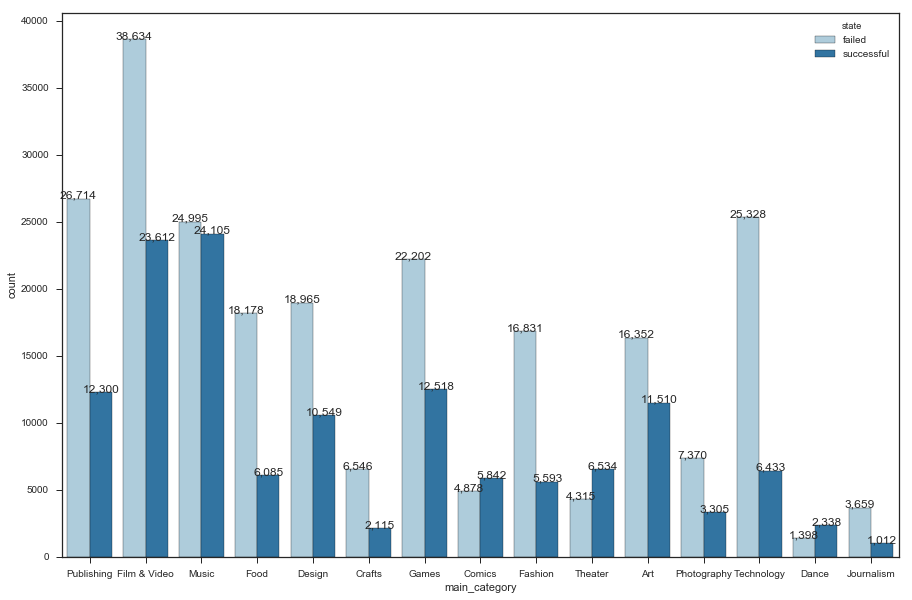

In [91]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax3=sns.countplot(x="main_category",hue="state",data=ks, ax=ax, palette="Paired")

for p in ax3.patches:
   height = p.get_height()
   ax.text(p.get_x()+p.get_width()/2.,height ,"{:,}".format(height), ha="center") 

### Top3 successful Main Categories

In [28]:
Top3_Categories_by_Success = ks[(ks.main_category == "Dance")|(ks.main_category == "Comics")|(ks.main_category == "Theater") ]
Top3_Categories_by_Success[["state","backer_per_length"]].groupby("state").describe()


backer_per_length                                          \
                       count      mean        std      min       25%   
state                                                                  
failed               10591.0  0.508146   1.551819  0.00000  0.034334   
successful           14714.0  4.636629  13.040090  0.01681  1.045655   

                                            
                 50%       75%         max  
state                                       
failed      0.148726  0.486839   95.112196  
successful  2.026461  4.065357  672.454800

In [29]:
Top3_Categories_by_Success.groupby('main_category').state.value_counts().unstack()

state,failed,successful
main_category,,
Comics,4878,5842
Dance,1398,2338
Theater,4315,6534


How many entries in the dataset are from which country?

### Distribution of the Project state across the countries

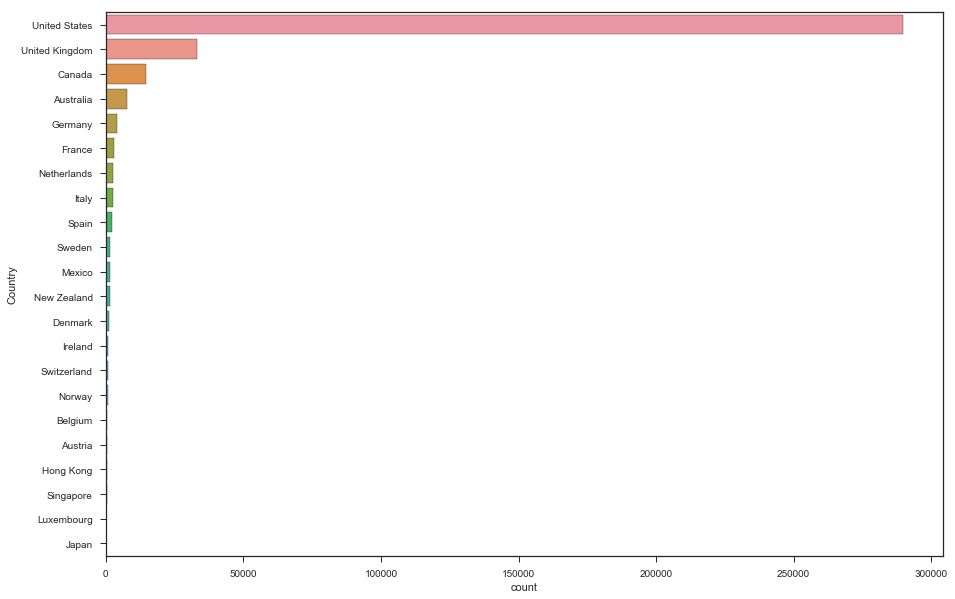

In [85]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.countplot(y="Country",data=ks,order = ks['Country'].value_counts().index,ax=ax)

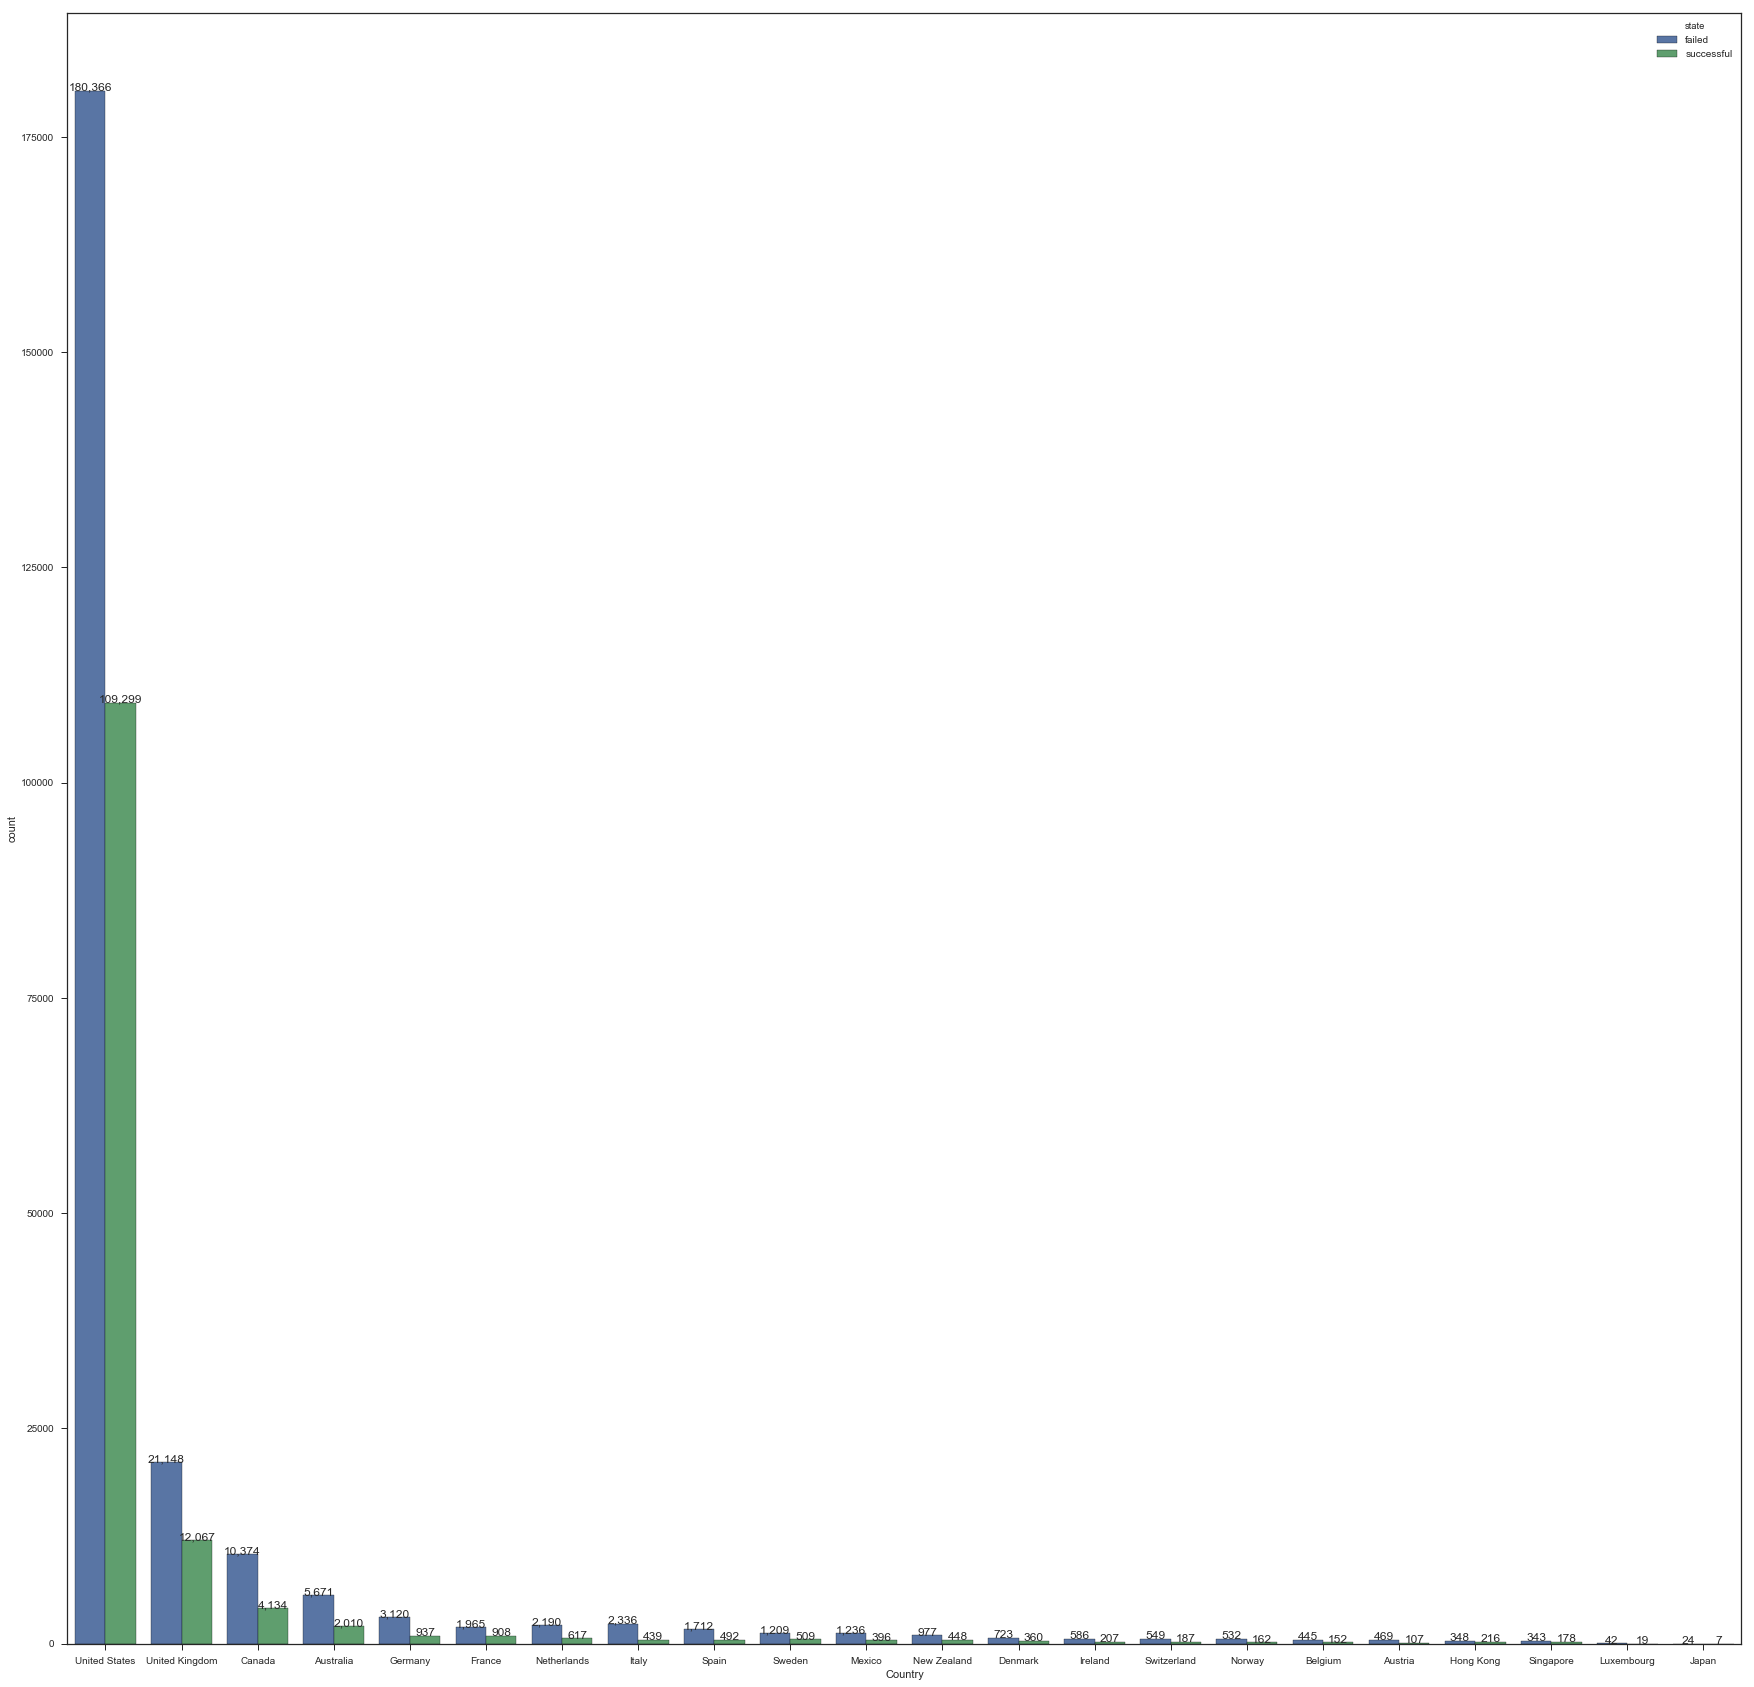

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
ax4=sns.countplot(x="Country",data=ks,hue="state",order = ks['Country'].value_counts().index,ax=ax)

for p in ax4.patches:
   height = p.get_height()
   ax.text(p.get_x()+p.get_width()/2.,height ,"{:,}".format(height), ha="center") 

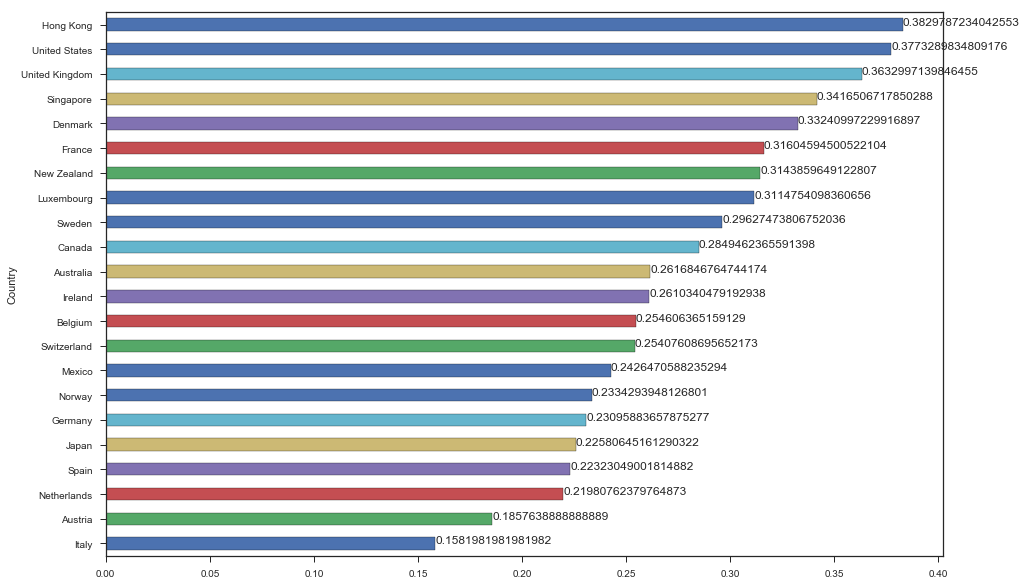

In [102]:
Country_byState = ks.groupby("Country").state.value_counts().unstack()
success_rate_perCountry= Country_byState.successful / (Country_byState.successful + Country_byState.failed)
success_rate_perCountry=success_rate_perCountry.sort_values(ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax1=success_rate_perCountry.plot(kind="barh",ax=ax)
for p in ax1.patches:
   width = p.get_width()
   ax.text(width, p.get_y()+p.get_height()/2.,"{:,}".format(width))

### How many backers do the projects have in each country?

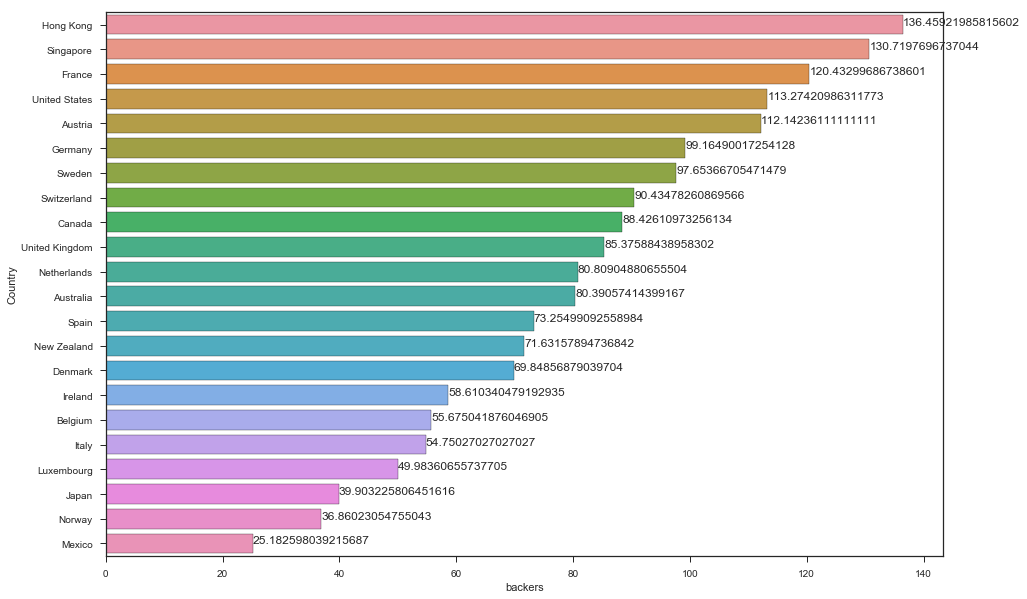

In [99]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ksSortbyBacker = ks.groupby(["Country"])['backers'].mean().reset_index().sort_values("backers", ascending=False)
ax2=sns.barplot(y="Country",x="backers",data=ks,ci=None, ax=ax,order=ksSortbyBacker['Country'])

for p in ax2.patches:
   width = p.get_width()
   ax.text(width, p.get_y()+p.get_height()/2.,"{:,}".format(width))
#-> backers = mean


### Top5 and Bottom5 Projects

We have a look at the projects which were the most successful and which failed the most. This is measured by the "pledged_delta" variable, which tells us how much money the people spent below or above the original goal

In [34]:
Top5=ks.sort_values(by="pledged_delta",ascending=False)
Top5.head()

,name,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,Country,project_length,goal_per_day,pledged_delta,pledged_per_backer,pledged_per_day,backer_per_length
157266,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,2015-03-28,2015-02-24 15:44:42,successful,78471,20338986.27,500000.0,United States,31.343958,15952.037540,19838986.27,259.191119,648896.545028,2503.544676
250249,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,2014-08-30,2014-07-08 10:14:37,successful,62642,13285226.36,50000.0,United States,52.573183,951.055220,13235226.36,212.081772,252699.677567,1191.520022
289909,Kingdom Death: Monster 1.5,Tabletop Games,Games,2017-01-08,2016-11-25 06:01:41,successful,19264,12393139.69,100000.0,United States,43.748831,2285.775361,12293139.69,643.331587,283279.333447,440.331765
216625,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,2016-06-30,2016-05-24 15:49:52,successful,66673,12779843.49,1000000.0,United States,36.340370,27517.606172,11779843.49,191.679443,351670.700099,1834.681356
282410,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,2012-05-19,2012-04-11 06:59:04,successful,68929,10266845.74,100000.0,United States,37.708981,2651.888120,10166845.74,148.948131,272265.262456,1827.919962


In [35]:
Bottom5=ks.sort_values(by="pledged_delta",ascending=False)
Bottom5.tail()

,name,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,Country,project_length,goal_per_day,pledged_delta,pledged_per_backer,pledged_per_day,backer_per_length
226157,Kitchen from Austria in Switzerland,Restaurants,Food,2015-10-05,2015-08-06 19:12:10,failed,0,0.00,1.040572e+08,Switzerland,59.199884,1.757726e+06,-1.040572e+08,NaN,0.000000,0.000000
222204,DER NEANDERTALER (Kinofilm mit Starbesetzung i...,Movie Theaters,Film & Video,2017-03-14,2017-01-13 20:08:41,failed,2,38.65,1.073699e+08,Germany,59.160637,1.814887e+06,-1.073698e+08,19.325,0.653306,0.033806
367921,Hydroponic's Skyscraper(un gratte-ciel hydropo...,Technology,Technology,2015-10-24,2015-08-25 23:52:30,failed,2,2.20,1.101698e+08,France,59.005208,1.867119e+06,-1.101698e+08,1.100,0.037285,0.033895
196527,A Celtic Lovestory,Drama,Film & Video,2015-11-30,2015-11-17 00:47:15,failed,0,0.00,1.513959e+08,United Kingdom,12.967187,1.167531e+07,-1.513959e+08,NaN,0.000000,0.000000
47802,FUCK Potato Salad. Paleo Potato Brownies!,Food,Food,2014-08-08,2014-07-09 00:24:34,failed,0,0.00,1.663614e+08,United Kingdom,29.982940,5.548535e+06,-1.663614e+08,NaN,0.000000,0.000000


Another way to look at successful projects is to check how many backers spent money on a project. This is measured by "backer per length" which shows the count of backers across the project length

In [36]:
Top5=ks.sort_values(by="backer_per_length",ascending=False)
Top5.head()

,name,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,Country,project_length,goal_per_day,pledged_delta,pledged_per_backer,pledged_per_day,backer_per_length
187648,Exploding Kittens,Tabletop Games,Games,2015-02-20,2015-01-20 19:00:19,successful,219382,8782571.99,10000.0,United States,30.208113,331.036893,8772571.99,40.033239,290735.534066,7262.353557
75897,Fidget Cube: A Vinyl Desk Toy,Product Design,Design,2016-10-20,2016-08-30 22:02:09,successful,154926,6465690.30,15000.0,United States,50.081840,299.509761,6450690.30,41.734056,129102.490327,3093.456613
292238,"Bring Reading Rainbow Back for Every Child, Ev...",Web,Technology,2014-07-02,2014-05-28 15:05:45,successful,105857,5408916.95,1000000.0,United States,34.371007,29094.288731,4408916.95,51.096450,157368.591463,3079.834122
148581,The Veronica Mars Movie Project,Narrative Film,Film & Video,2013-04-13,2013-03-13 15:42:22,successful,91585,5702153.38,2000000.0,United States,30.345579,65907.459519,3702153.38,62.260778,187907.221532,3018.067340
264307,We the People: public art for the inauguration...,Public Art,Art,2017-01-19,2017-01-11 00:21:36,successful,22834,1364835.45,60000.0,United States,7.985000,7514.088917,1304835.45,59.772070,170924.915466,2859.611772


### Distribution of Project goals
After having a look at various counts of the Projects, we need to see the sizes of those projects. 
i.e. What are the goals of the projects in various categories?
However, we'll use the normalized value, which is the goal per day. Longer projects may very well have higher goals, that's why the goal_per_day is a more reliable value. We also want to see how the features correlate with the outcome.
We will use both goal_per_day and us_real_goal, whenever suitable.

[array([6.72256746e+01, 2.83279803e-04]), array([ 511.88003049, 1178.84883228])]


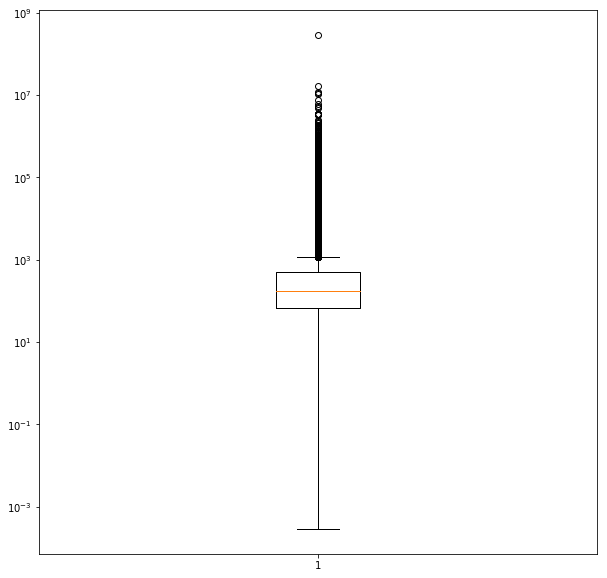

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt.yscale("log")

B= plt.boxplot(ks.goal_per_day)

print([item.get_ydata() for item in B['whiskers']])

In the first histogram showing the goal of the projects in the Profile Report, we don't see much. We only saw, that the USD_goal is highly skewed. Here, we produced a boxplot with a logarithmic scale to see the data better.
For a better overview we seperate the goal value in 3 sections. High, medium and low.


In [38]:
ks[["state", "goal_per_day"]].groupby("state").describe()

goal_per_day                                                   \
                  count         mean            std       min        25%   
state                                                                      
failed         236365.0  3270.071638  600876.794365  0.000283  84.265554   
successful     133851.0   309.142848     898.545207  0.001153  47.215523   

                                                  
                   50%         75%           max  
state                                             
failed      237.309308  682.429826  2.903031e+08  
successful  125.522246  320.328158  6.836987e+04

We can see, that the maximum goal_per_day for successful projects is 68369. For cancelled and failed projects it is much higher!! Let's look at the distribution of  projects with goal_per_day < 70000. We can take a look at how many failed project there are, that were over this threshold, to see how reliable this information is:

In [39]:
PrjOver70k = ks[(ks["goal_per_day"]>70000)].groupby('main_category').state.value_counts().unstack()
print(PrjOver70k)

state          failed
main_category        
Art                26
Comics              3
Crafts              3
Design             29
Fashion            10
Film & Video      178
Food               22
Games              40
Journalism         12
Music              25
Photography         4
Publishing         28
Technology        107
Theater            11


**All** projects over 70k per day were failed and we have plenty of projects that were over 70 000 and failed. Let's also look at the distribution for the ones under 70k.

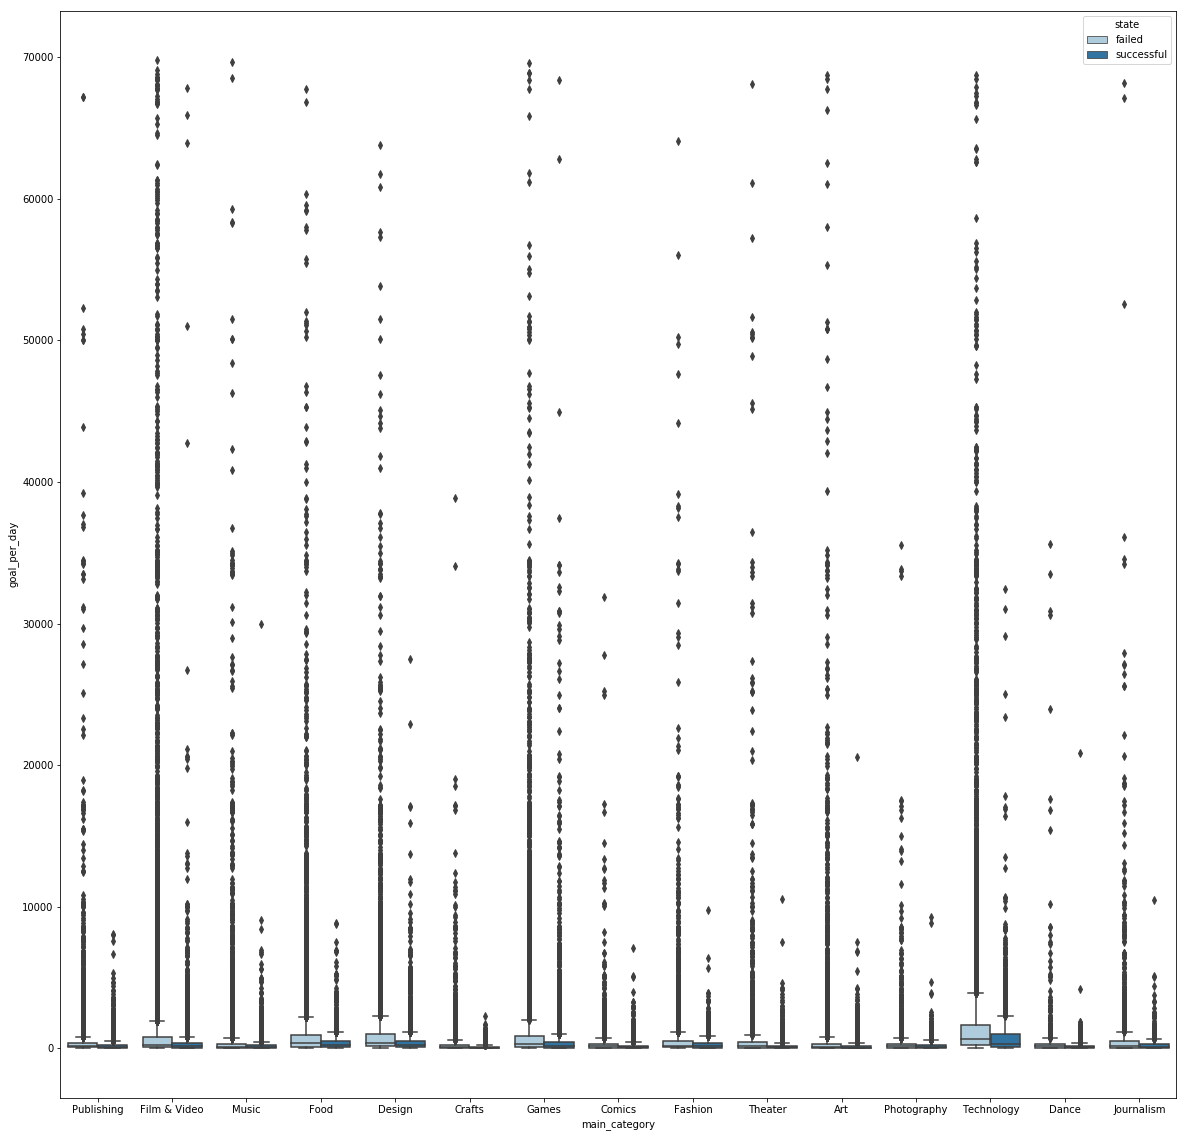

In [40]:
plt.figure(figsize=(20,20)) 
# plt.yscale("log")
sns.boxplot(x="main_category", y="goal_per_day",data=ks[(ks["goal_per_day"]<70000)], palette="Paired",  hue="state")

Here as well, we have many many outliers, which will probably affect our analysis a lot. 
Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:

* It increases the error variance and reduces the power of statistical tests
* If the outliers are non-randomly distributed, they can decrease normality
* They can bias or influence estimates that may be of substantive interest
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

We're also gonna check for outliers for the attributes usd_goal_real and project_length

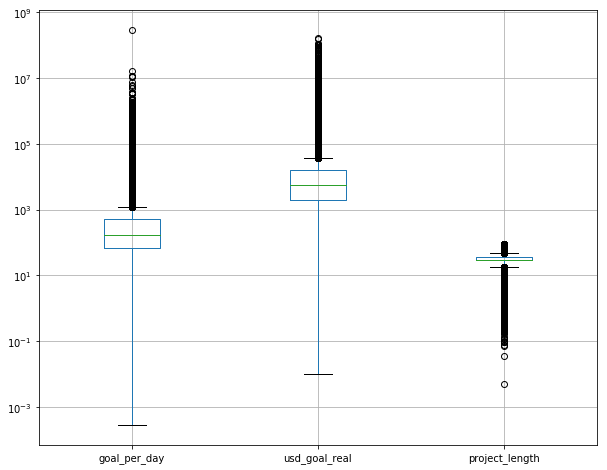

In [41]:
plt.figure(figsize=(10,8))

ks1 = ks[['goal_per_day','usd_goal_real', 'project_length']]

plt.yscale("log")
ks1.boxplot()

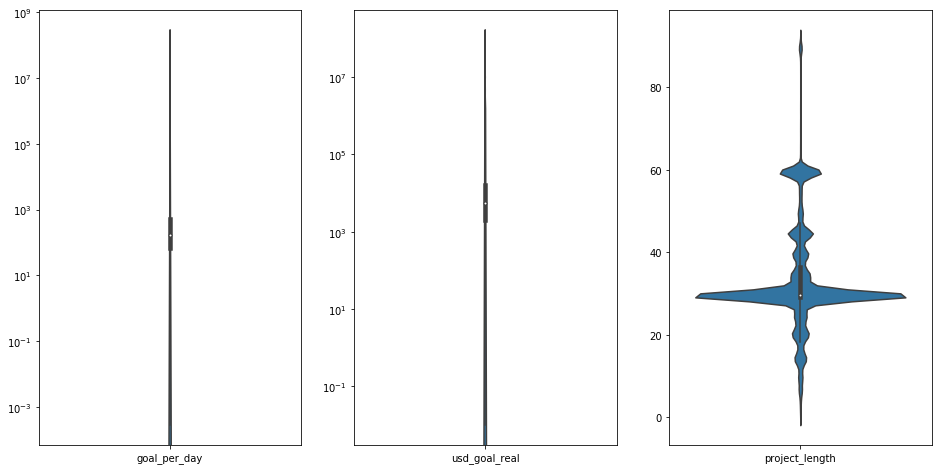

In [42]:
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.yscale("log")
sns.violinplot(data=ks1[["goal_per_day"]])

plt.subplot(1,3,2)
plt.yscale("log")
sns.violinplot(data=ks1[["usd_goal_real"]])

plt.subplot(1,3,3)
sns.violinplot(data=ks1[["project_length"]])

[array([6.72256746e+01, 2.83279803e-04]), array([ 511.88003049, 1178.84883228])]
[array([2.e+03, 1.e-02]), array([15987.53, 36963.11])]
[array([29.09658275, 18.25221065]), array([36.32620949, 47.17023148])]


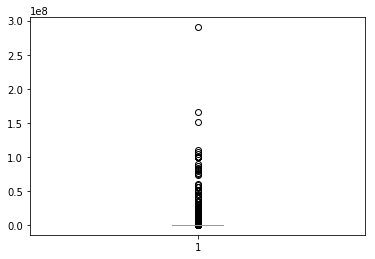

In [43]:
print([item.get_ydata() for item in plt.boxplot(ks.goal_per_day)['whiskers']])
print([item.get_ydata() for item in plt.boxplot(ks.usd_goal_real)['whiskers']])
print([item.get_ydata() for item in plt.boxplot(ks.project_length)['whiskers']])


We split the dataset into the ones without the outliers and the outliers according to the values of the boxplot for goal_per_day and usd_goal_real. We use the end of each whisker of the boxplot as thresholds for our outliers, but we used some rounded numbers. For project_length however, when visualizing with a violinplot we can see another peak at around 60 days, which means that there are a lot of projects with this length. We don't want to lose this information even though the boxplot indicates outliers from ~ 48 days on. Also, we don't want to exclude too many data points, as we might lose interesting information. Thus, we also only remove projects under 10 days and not 18, as the boxplot indicates. We're using an approach combining what the data tells us and what we think make sense. 

In [44]:
# Create dataset without outliers
# and one with only the outliers
mainKS=ks[((ks["goal_per_day"]<=1200) & (ks["project_length"]<=90))&(ks["usd_goal_real"]<=38000) &(ks["goal_per_day"]>0.0002)& (ks["project_length"]>=5) & (ks["usd_goal_real"]>0.01)]
ksUpperOutliers=ks[((ks["goal_per_day"]>1200)| (ks["project_length"]>90) | (ks["usd_goal_real"]>38000))]
ksLowerOutliers=ks[(ks["goal_per_day"]<=0.0002)| (ks["project_length"]<5)| (ks["usd_goal_real"]<=0.01)]

print("Original no. projects: ", len(ks.index))
print("Cleansed no. projects: ", len(mainKS.index))
print("Upper outliers: ", len(ksUpperOutliers.index))
print("Lower outliers: ", len(ksLowerOutliers.index))


Original no. projects:  370216
Cleansed no. projects:  322109
Upper outliers:  47215
Lower outliers:  1148


Let's have a look at the summary again

In [45]:
mainKS.describe()

,backers,usd_pledged_real,usd_goal_real,project_length,goal_per_day,pledged_delta,pledged_per_backer,pledged_per_day,backer_per_length
count,322109.000000,3.221090e+05,322109.000000,322109.000000,322109.000000,3.221090e+05,2.800830e+05,322109.000000,322109.000000
mean,81.305021,5.614258e+03,7633.151981,33.260119,240.043097,-2.018894e+03,inf,179.640793,2.687847
std,649.890230,4.220006e+04,8062.914948,12.464350,252.786872,4.197124e+04,NaN,1211.577638,19.828068
min,0.000000,0.000000e+00,0.150000,5.000428,0.002959,-3.800000e+04,4.500000e-01,0.000000,0.000000
25%,2.000000,4.000000e+01,1700.000000,29.085671,55.151368,-6.480810e+03,2.524333e+01,1.198826,0.066949
50%,13.000000,6.600000e+02,5000.000000,29.639016,151.269894,-1.102580e+03,4.689655e+01,21.571600,0.432542
75%,57.000000,3.830000e+03,10000.000000,35.002616,338.436782,2.530000e+02,7.922056e+01,127.721663,1.908180
max,219382.000000,9.192056e+06,38000.000000,89.998183,1199.994762,9.172056e+06,inf,290735.534066,7262.353557


Let's once again look at the distribution of the goal per day again. This time as well in another histogram. Now that we have removed the outlier information, we should be able to generate a nicer histogram. 

C:\Users\hammerej\AppData\Local\Continuum\Anaconda3\envs\condatascience\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



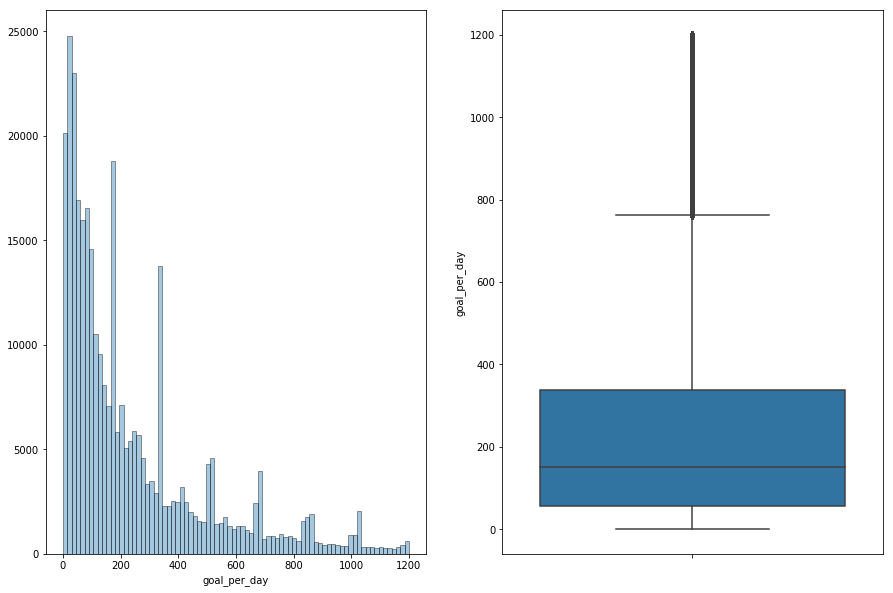

In [46]:
# fig, ax = plt.subplots()
plt.figure(figsize=(15,10))
# plt.rcParams["patch.force_edgecolor"] = True
plt.subplot(1,2,1)
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(mainKS.goal_per_day, bins=80, kde = False, hist_kws=dict(edgecolor="black"))
plt.subplot(1,2,2)
sns.boxplot(y="goal_per_day",data=mainKS)
plt.show()

### Project Goals per Main Category
We want to also see if there are bigger differences between the different main categories. As, the categories have a very high cardinality, we don't look at it at this point. We look at the total goal and also the goal_per_day. 

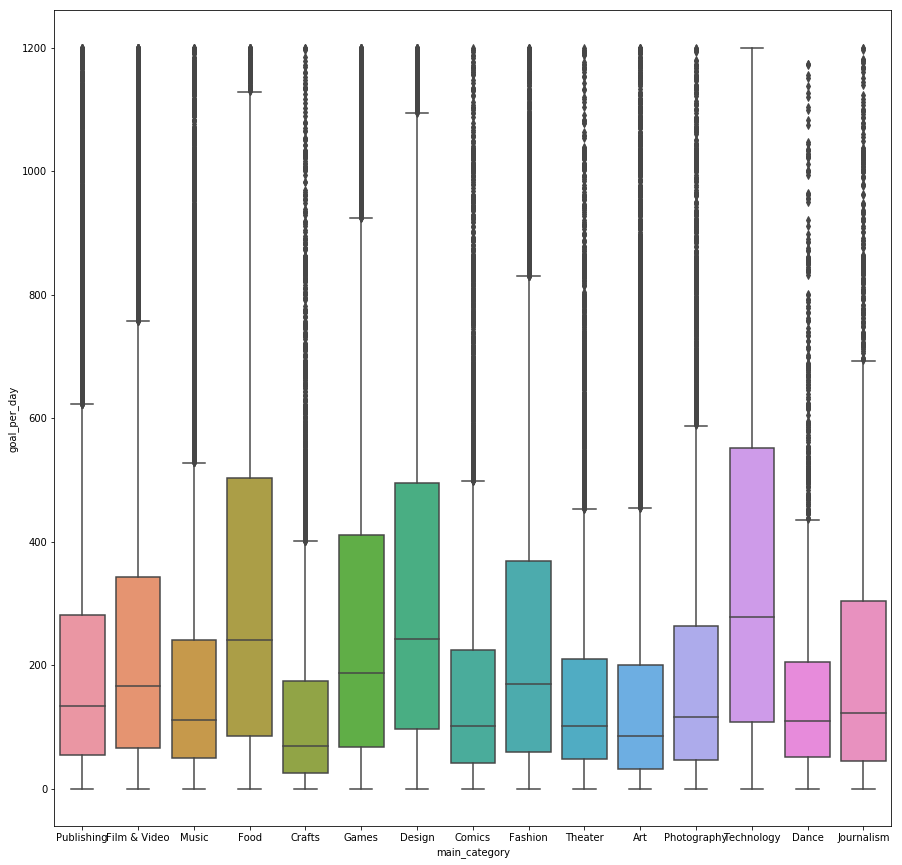

In [47]:
plt.figure(figsize=(15,15))
sns.boxplot(x="main_category", y="goal_per_day",data=mainKS)

 In general, we see that the range stays in around the same amount, with only "Technology" slightly sticking out for having higher goals. In summary, "Dance", "Crafts" and "Art" have slightly lower goals, whereas "Technology" requires most donations.


### Project Goals per Country
Also, interesting would be to see if there are differences by counties:


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

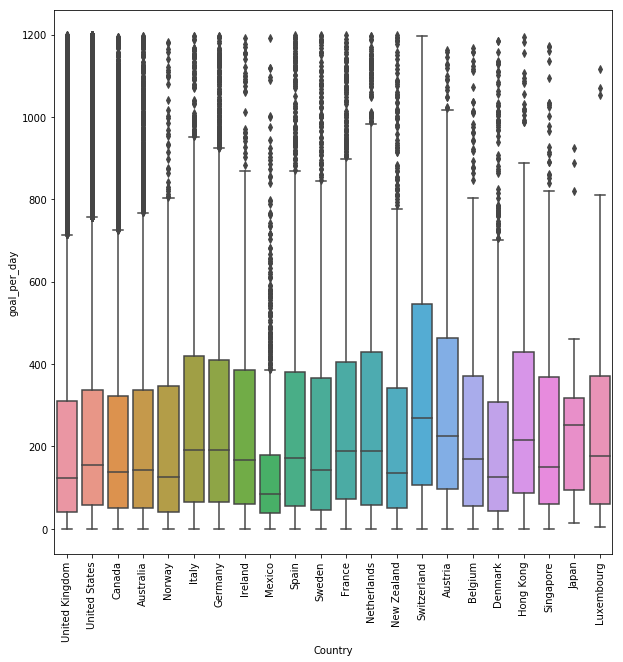

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Country", y="goal_per_day",data=mainKS)
plt.xticks(rotation=90)

There isn't much variation between the countries, except for US having some particularly low goals for some project. This isn't surprising though, as most projects come from USA.

We want to see the average, median, and possibly other basic statistics for each category and country.

In [49]:
mainKS[["main_category", "goal_per_day"]].groupby("main_category").describe().sort_values(by= ('goal_per_day', 'mean'), ascending =False)

goal_per_day                                                \
                     count        mean         std       min         25%   
main_category                                                              
Technology         20864.0  363.008341  304.929681  0.013353  108.192709   
Design             23873.0  324.708181  283.354228  0.012576   96.427924   
Food               19704.0  324.613683  292.061196  0.015080   85.970278   
Games              28906.0  284.989801  275.835577  0.011222   68.496775   
Fashion            20443.0  262.343322  261.959733  0.016683   60.220185   
Film & Video       52144.0  252.739902  257.142413  0.002959   66.677367   
Journalism          4082.0  216.958983  242.779631  0.034283   45.217250   
Publishing         36757.0  211.252504  223.985939  0.012912   54.719416   
Photography        10100.0  198.559304  221.309937  0.017350   46.893813   
Music              46802.0  183.387957  200.047775  0.012980   50.056640   
Comics             10310.0  175.829036  203.091205  0.016698   41.323340   
Theater            10168.0  170.656520  192.535023  0.016810   48.879234   
Dance               3599.0  167.646617  178.799790  0.175556   51.998958   
Art                26146.0  161.220111  202.219197  0.012344   31.878875   
Crafts              8211.0  147.699343  194.342936  0.028645   24.989149   

                                                    
                      50%         75%          max  
main_category                                       
Technology     277.477364  552.219458  1199.907626  
Design         242.741632  495.770003  1199.971416  
Food           240.358248  503.082047  1199.691032  
Games          188.055223  410.881260  1199.890486  
Fashion        170.359543  368.028152  1199.577768  
Film & Video   166.817040  343.114002  1199.958573  
Journalism     123.121441  304.239314  1199.536370  
Publishing     134.871197  281.890723  1199.994762  
Photography    116.997528  263.653341  1199.076901  
Music          111.277241  241.346174  1199.608223  
Comics         102.395618  223.992180  1199.755288  
Theater        102.406627  210.709508  1199.800985  
Dance          110.010497  205.672267  1174.121341  
Art             85.557881  201.141080  1199.722445  
Crafts          68.770891  175.245494  1199.717685

In [50]:
mainKS[["Country", "goal_per_day"]].groupby("Country").describe().sort_values(by= ('goal_per_day', 'mean'), ascending =False)

goal_per_day                                                 \
                      count        mean         std        min         25%   
Country                                                                      
Switzerland           516.0  353.883301  298.824962   0.631409  105.369026   
Austria               432.0  323.084049  288.280626   0.388766   95.762642   
Italy                2148.0  293.722940  287.296837   0.037953   65.302578   
Germany              3215.0  291.083366  282.516318   0.019945   65.970536   
Hong Kong             472.0  290.402189  264.015314   0.043810   85.972714   
Netherlands          2217.0  288.133684  288.115322   0.037716   57.538535   
France               2330.0  283.804368  273.289350   0.018431   73.061469   
Japan                  26.0  283.051825  251.158928  14.493476   95.481947   
Luxembourg             47.0  280.831266  299.888700   3.752091   60.870082   
Spain                1806.0  266.547850  280.995865   0.026491   54.601642   
Ireland               659.0  264.235169  270.539423   0.560937   59.227567   
Belgium               485.0  258.239505  266.792897   0.017859   54.804283   
Singapore             469.0  254.934343  264.182196   0.242780   61.520813   
Sweden               1475.0  247.593354  272.265046   0.093139   44.956119   
New Zealand          1251.0  240.446578  260.995426   0.012912   50.646606   
Australia            6504.0  239.960375  254.666976   0.012576   50.782593   
United States      253613.0  239.808307  250.377903   0.002959   58.440124   
Canada              12527.0  234.088680  248.666156   0.012839   51.411771   
Denmark               944.0  230.026468  258.732788   0.025085   43.684622   
Norway                588.0  229.847996  263.109370   0.234443   41.243914   
United Kingdom      28822.0  226.230712  257.976929   0.020506   41.884917   
Mexico               1563.0  142.516302  167.652366   0.017624   38.949045   

                                                     
                       50%         75%          max  
Country                                              
Switzerland     268.662349  544.986300  1197.670743  
Austria         225.573910  464.591721  1162.821429  
Italy           190.273244  419.964422  1197.834866  
Germany         190.368300  409.663417  1197.901735  
Hong Kong       216.310201  429.291071  1193.169830  
Netherlands     188.134583  428.710729  1197.891096  
France          189.959758  404.417697  1198.187342  
Japan           251.090332  318.817725   924.778600  
Luxembourg      175.851756  370.802162  1116.652374  
Spain           173.056484  380.763960  1199.021801  
Ireland         167.092903  384.845737  1191.681620  
Belgium         168.800554  371.134882  1166.847406  
Singapore       151.265798  367.677100  1173.599405  
Sweden          143.877097  365.225433  1198.853986  
New Zealand     136.360289  343.089261  1199.395068  
Australia       143.946946  337.796357  1197.177279  
United States   154.664027  337.930598  1199.994762  
Canada          138.415877  321.437399  1195.342114  
Denmark         125.691700  308.021846  1184.532697  
Norway          126.505792  346.208748  1181.682935  
United Kingdom  123.028095  311.046971  1199.971416  
Mexico           83.562718  178.168635  1192.412885

Next we'll look into the project status with regard to the different attributes. Also, we want to have a look at the project status for the outliers. 

In [51]:
print("Successrate lower Outliers:" , (ksLowerOutliers.state == 'successful').sum()/len(ksLowerOutliers.index))
print("Successrate main dataset:" , (mainKS.state == 'successful').sum()/len(mainKS.index))
print("Successrate upper Outliers:" , (ksUpperOutliers.state == 'successful').sum()/len(ksUpperOutliers.index))

Successrate lower Outliers: 0.38153310104529614
Successrate main dataset: 0.39358105486031125
Successrate upper Outliers: 0.14124748490945674


Text(0.5,1,'Success rate upper outliers')

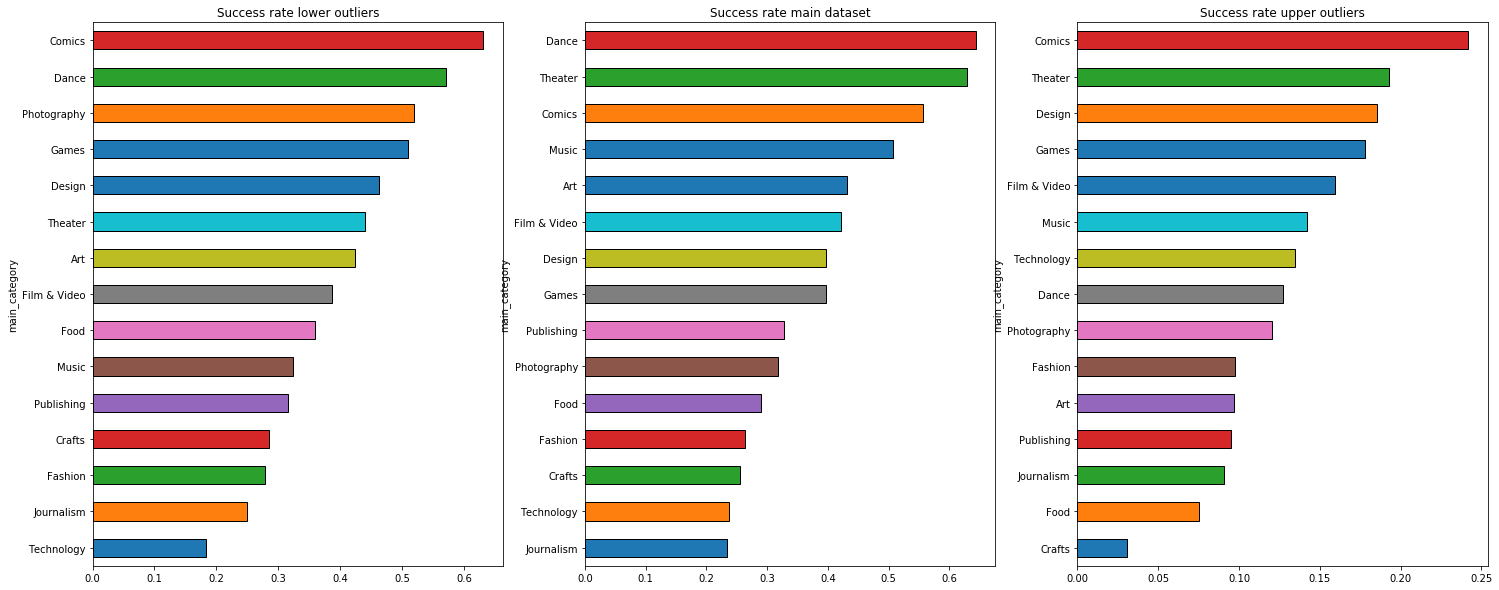

In [52]:
# Success rate - outlier
a = ksLowerOutliers.groupby('main_category').state.value_counts().unstack()
ksLowerOutliers_successrate_percat= a.successful / (a.successful + a.failed)
ksLowerOutliers_successrate_percat=ksLowerOutliers_successrate_percat.sort_values(ascending=True)

b = mainKS.groupby('main_category').state.value_counts().unstack()
mainKS_successrate_percat= b.successful / (b.successful  + b.failed)
mainKS_successrate_percat=mainKS_successrate_percat.sort_values(ascending=True)

c = ksUpperOutliers.groupby('main_category').state.value_counts().unstack()
ksUpperOutliers_successrate_percat= c.successful / (c.successful  + c.failed)
ksUpperOutliers_successrate_percat=ksUpperOutliers_successrate_percat.sort_values(ascending=True)

plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
ksLowerOutliers_successrate_percat.plot(kind="barh")
plt.title("Success rate lower outliers")

plt.subplot(1,3,2)
mainKS_successrate_percat.plot(kind="barh")
plt.title("Success rate main dataset")

plt.subplot(1,3,3)
ksUpperOutliers_successrate_percat.plot(kind="barh")
plt.title("Success rate upper outliers")


# # Success rate
# success_rate2 = (ksUpperOutliers.state == 'successful').sum()/len(ksUpperOutliers.index)
# print(success_rate2)

### Goal_per_day for project status
We look into the projects goal again. 
This time with regard to the project status.

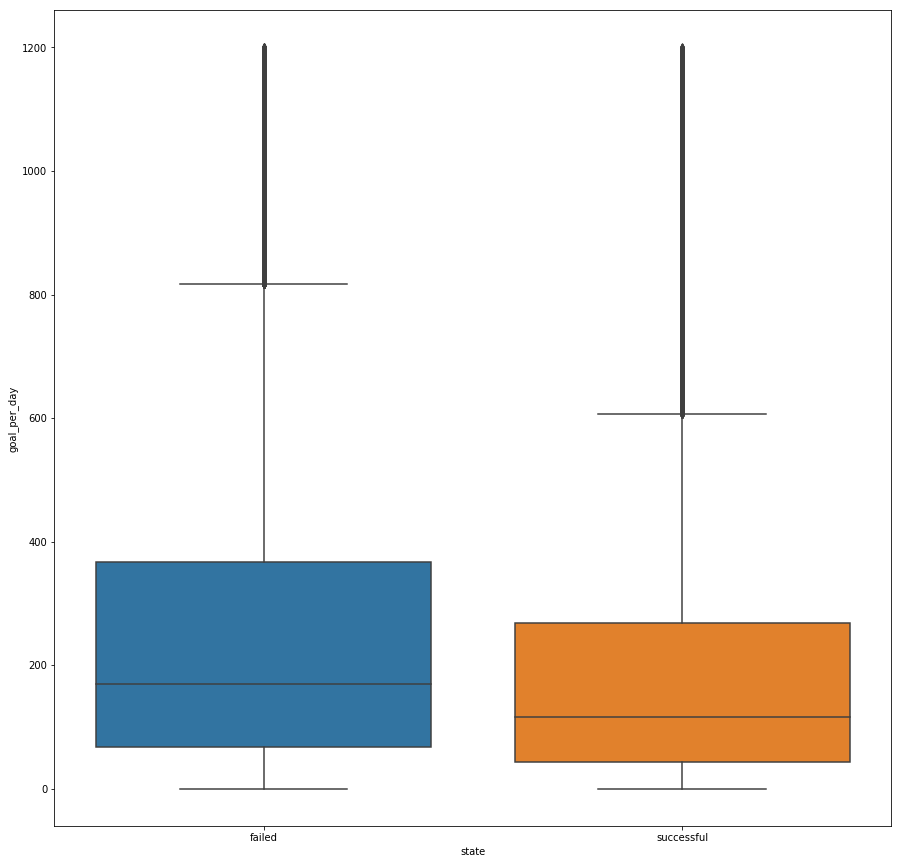

In [53]:
# plot project sizes with regard to project status
plt.figure(figsize=(15,15))
sns.boxplot(x="state", y="goal_per_day",data=mainKS)

We don't see a huge difference between the different statuses. Successful projects seem to have slightly smaller goals and much less and lower outliers.
It looks like projects with a goal up to 300 USD per day, have a more realistic chance of being successful. We also look into this including the categories.

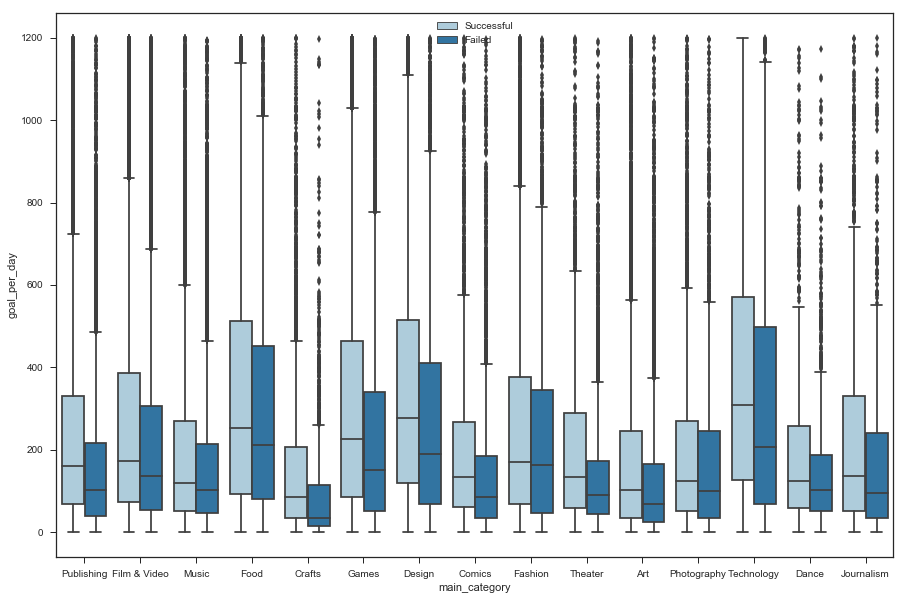

In [54]:
plt.figure(figsize=(15,10))
sns.set(style="ticks")
ax=sns.boxplot(x="main_category", y="goal_per_day", hue="state",data=mainKS, palette="Paired")
# sns.despine(offset=10, trim=True)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Successful", "Failed"])

In general, the successful projects in any category are more shifted towards having a lower goal. Expecially in "Crafts" and in "Technology" it can be nicely observerd. At this point we should also look at the relative successrate per category:

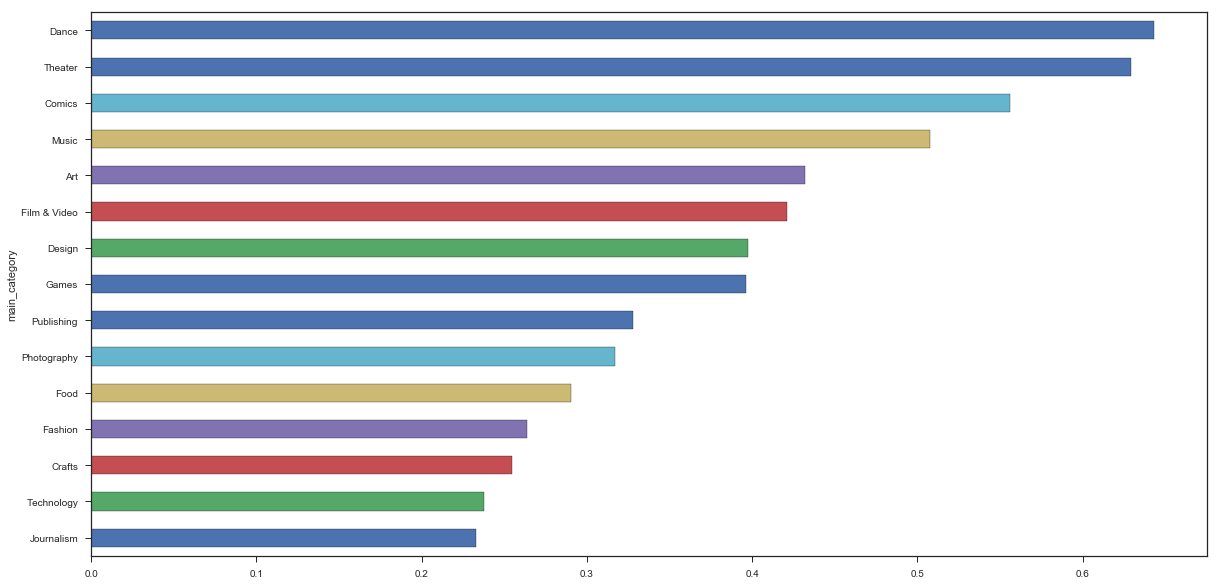

In [55]:
# Success rate per category
mainCategory_byState = mainKS.groupby('main_category').state.value_counts().unstack()
success_rate_perCategory= mainCategory_byState.successful / (mainCategory_byState.successful+ mainCategory_byState.failed)
success_rate_perCategory=success_rate_perCategory.sort_values(ascending=True)
plt.figure(figsize=(20,10))

success_rate_perCategory.plot(kind="barh")

Technologies are less successful, because they require high donations. Crafts and Journalism are also less successful, and also their goal tend to be higher. Here Particularly you can see the difference in the sizes.

### Project length and project status
Next we look into the distribution of the project length. 

C:\Users\hammerej\AppData\Local\Continuum\Anaconda3\envs\condatascience\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



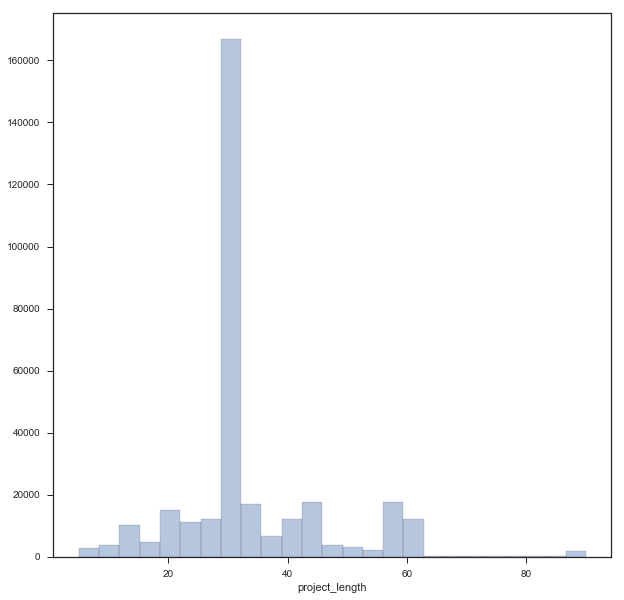

In [56]:
plt.figure(figsize=(10,10))
sns.distplot(mainKS.project_length, bins=25, kde = False, hist_kws=dict(edgecolor="black"))

We see a nicely shaped distribution, with most projects having a length of approximately 30 days/ 1 month. There is another smaller peak at 60 days/ 2 months, and another tiny rise at ~90 days


C:\Users\hammerej\AppData\Local\Continuum\Anaconda3\envs\condatascience\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\hammerej\AppData\Local\Continuum\Anaconda3\envs\condatascience\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



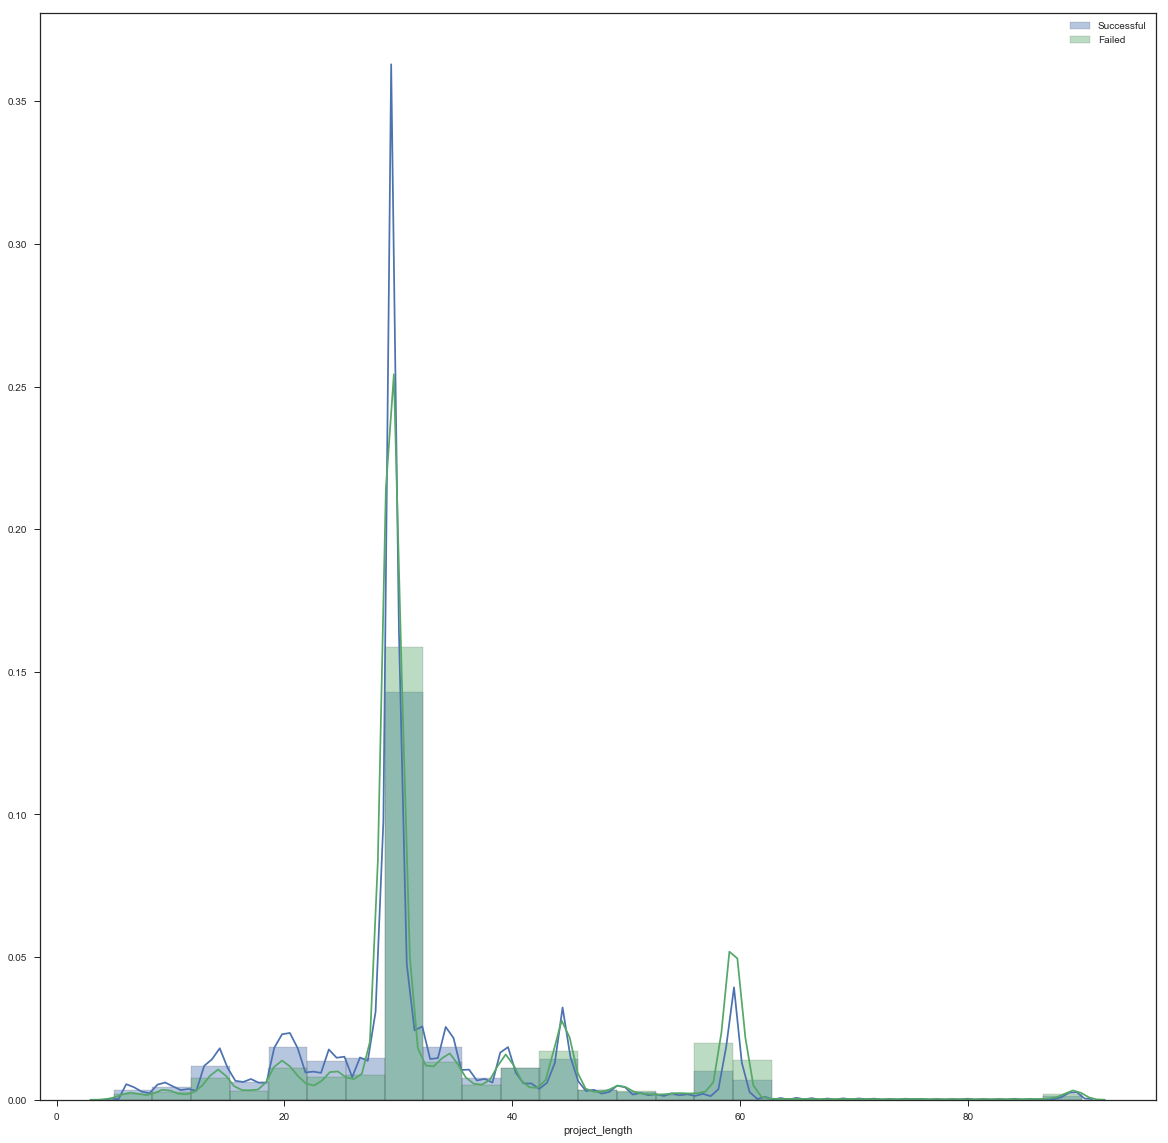

In [57]:
# We compare the distribution between successful and failed projects
plt.figure(figsize=(20,20))
sns.distplot(mainKS[(mainKS["state"]=="successful")].project_length, bins=25, kde = True, label="Successful", hist_kws=dict(edgecolor="black"))
sns.distplot(mainKS[(mainKS["state"]=="failed")].project_length, bins=25, kde = True,label="Failed", hist_kws=dict(edgecolor="black"))
plt.legend(loc="upper right")


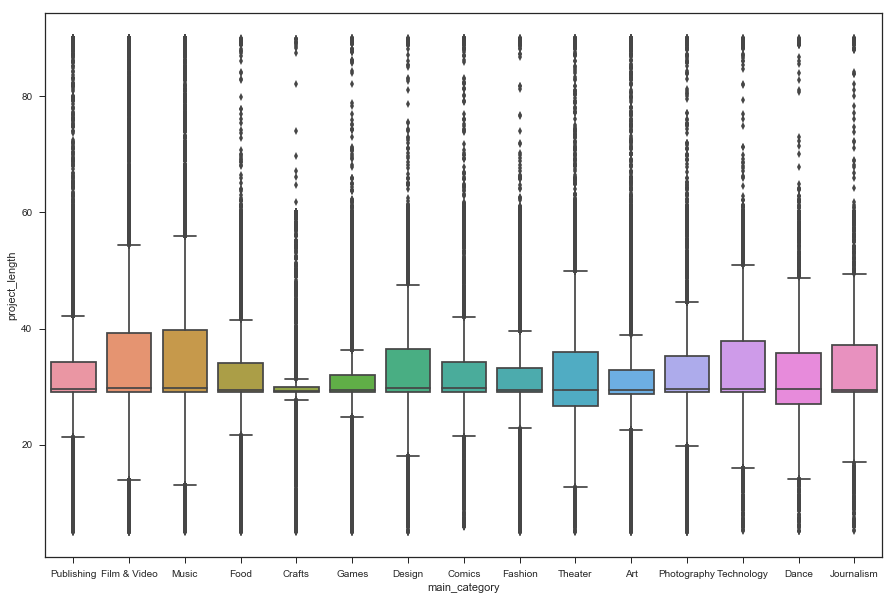

In [58]:
plt.figure(figsize=(15,10))
sns.boxplot(x="main_category", y="project_length",data=mainKS)


Next we look into how the project length vary for successful and failed projects.

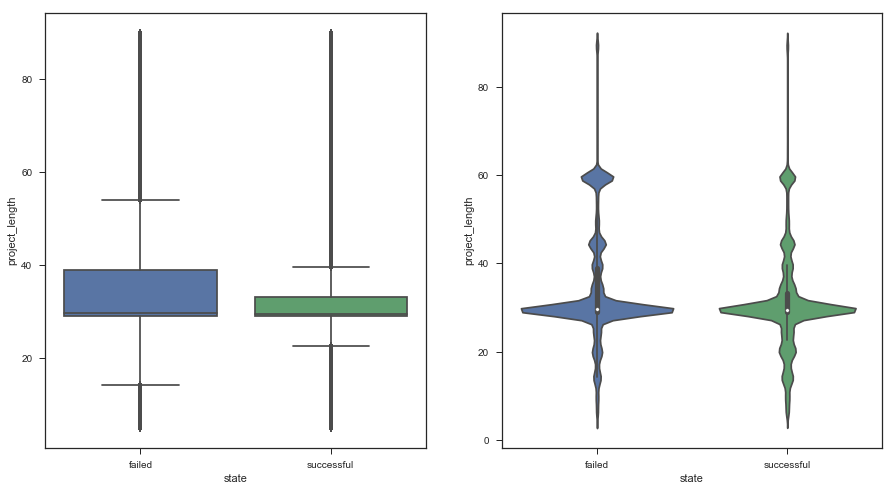

In [59]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(x="state", y="project_length",data=mainKS)
plt.subplot(1,2,2)
sns.violinplot(x="state", y="project_length",data=mainKS)


Even though the median looks the same for all three states, successful projects seems to have shorter deadlines. They are less skewed, even though there are still many outliers. 

We'll look into the different categories again:

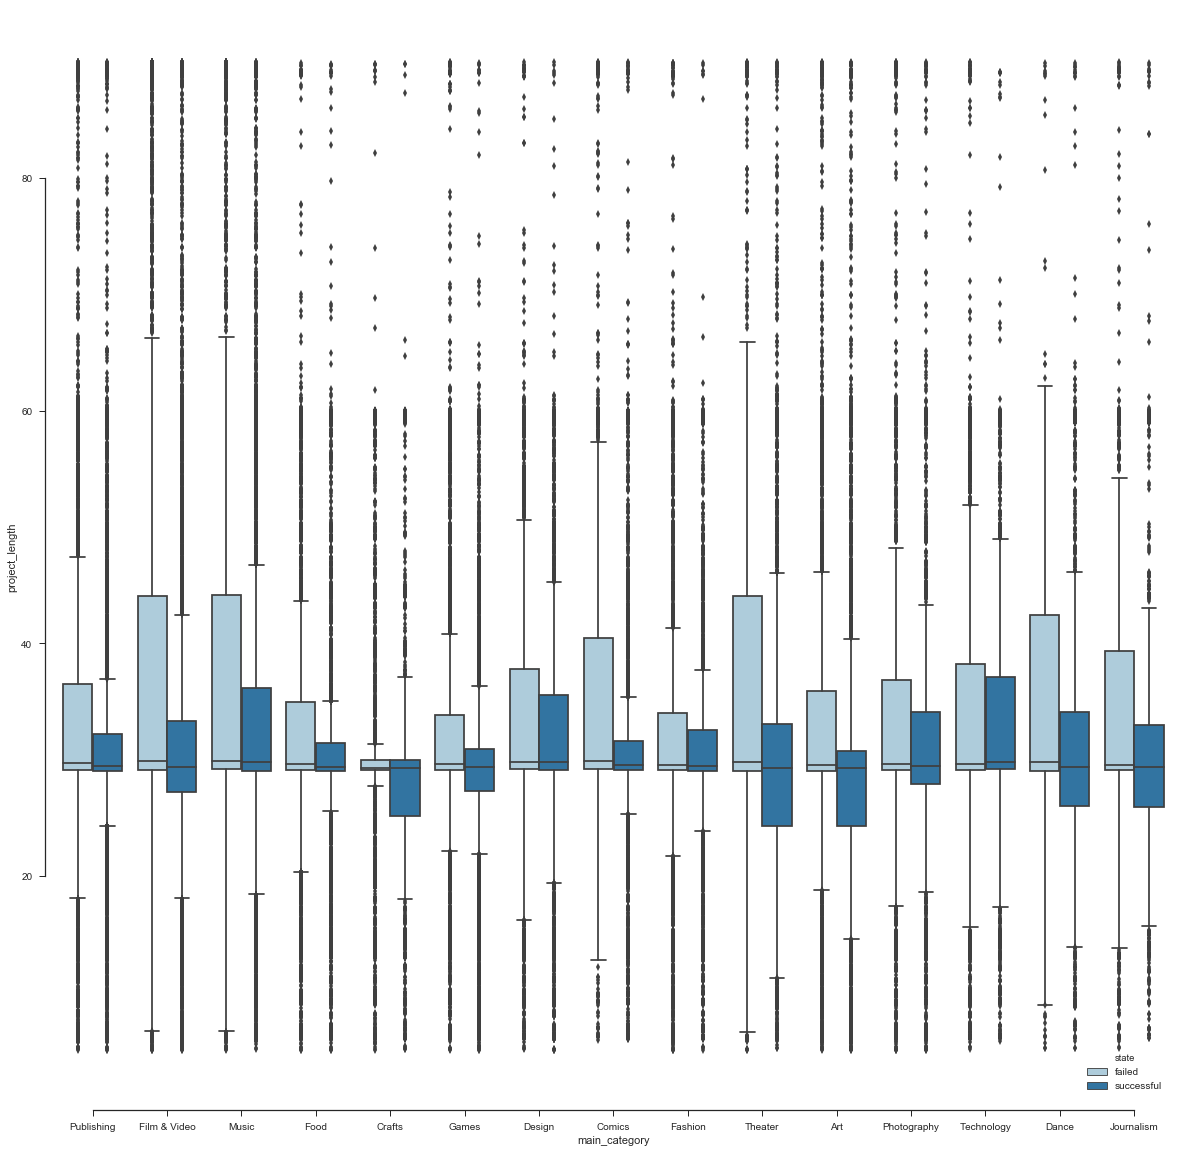

In [60]:
plt.figure(figsize=(20,20))
sns.set(style="ticks")
sns.boxplot(x="main_category", y="project_length", hue="state",data=mainKS, palette="Paired")
sns.despine(offset=10, trim=True)


We see the duration is shorter for successful projects in all categories.
Let's find the longest, successful project:

In [61]:
mainKS[["state", "project_length"]].groupby("state").describe()

project_length                                             \
                    count       mean        std       min        25%   
state                                                                  
failed           195333.0  34.378081  12.867822  5.000428  29.123171   
successful       126776.0  31.537593  11.606911  5.015069  28.982529   

                                             
                  50%        75%        max  
state                                        
failed      29.721169  39.045255  89.998183  
successful  29.453924  33.235075  89.996771

The maximum for all projects are similar so this doesn't tell us much.


### Goal per Day and Project Length
Let's look at these attributes in a combined way

(0, 70000)

<Figure size 2160x2160 with 0 Axes>

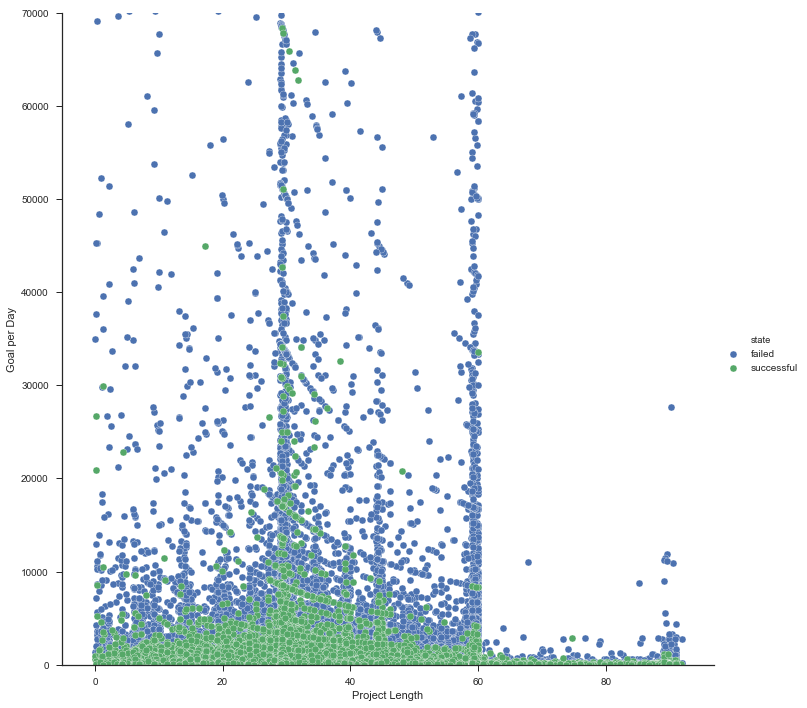

In [62]:
plt.figure(figsize=(30,30))
# sns.pairplot(ks.goal_per_day,ks.project_length, hue="state"proj   ,color='g',linestyle="None",marker=".",markersize=5)
sns.pairplot(y_vars=["goal_per_day"], x_vars=["project_length"], data=ks, hue="state", size=10)
plt.ylabel("Goal per Day")
plt.xlabel("Project Length")
plt.ylim([0,70000]) 

# Temporal Analysis

In [63]:
import time

Let's look at the history of projects.
First we can have a look at the count of successful and failed projects during the past years. We use the launch day for the time analysis

In [64]:
# First remove time from datetime in "launched"
mainKS["launched"]=pd.DatetimeIndex(mainKS.launched).normalize()

C:\Users\hammerej\AppData\Local\Continuum\Anaconda3\envs\condatascience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [65]:
mainKS["countProj"]=1

C:\Users\hammerej\AppData\Local\Continuum\Anaconda3\envs\condatascience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [66]:
timeAnalysisKS=mainKS.groupby("launched")["goal_per_day","countProj"].sum()
# we do that for successful and failed project in order to compare later
timeAnalysisKSSuccess=mainKS[(mainKS["state"]=="successful")].groupby("launched")["goal_per_day","countProj"].sum()
timeAnalysisKSFail=mainKS[(mainKS["state"]=="failed")].groupby("launched")["goal_per_day","countProj"].sum()

In [67]:
list(timeAnalysisKS.columns.values)

['goal_per_day', 'countProj']

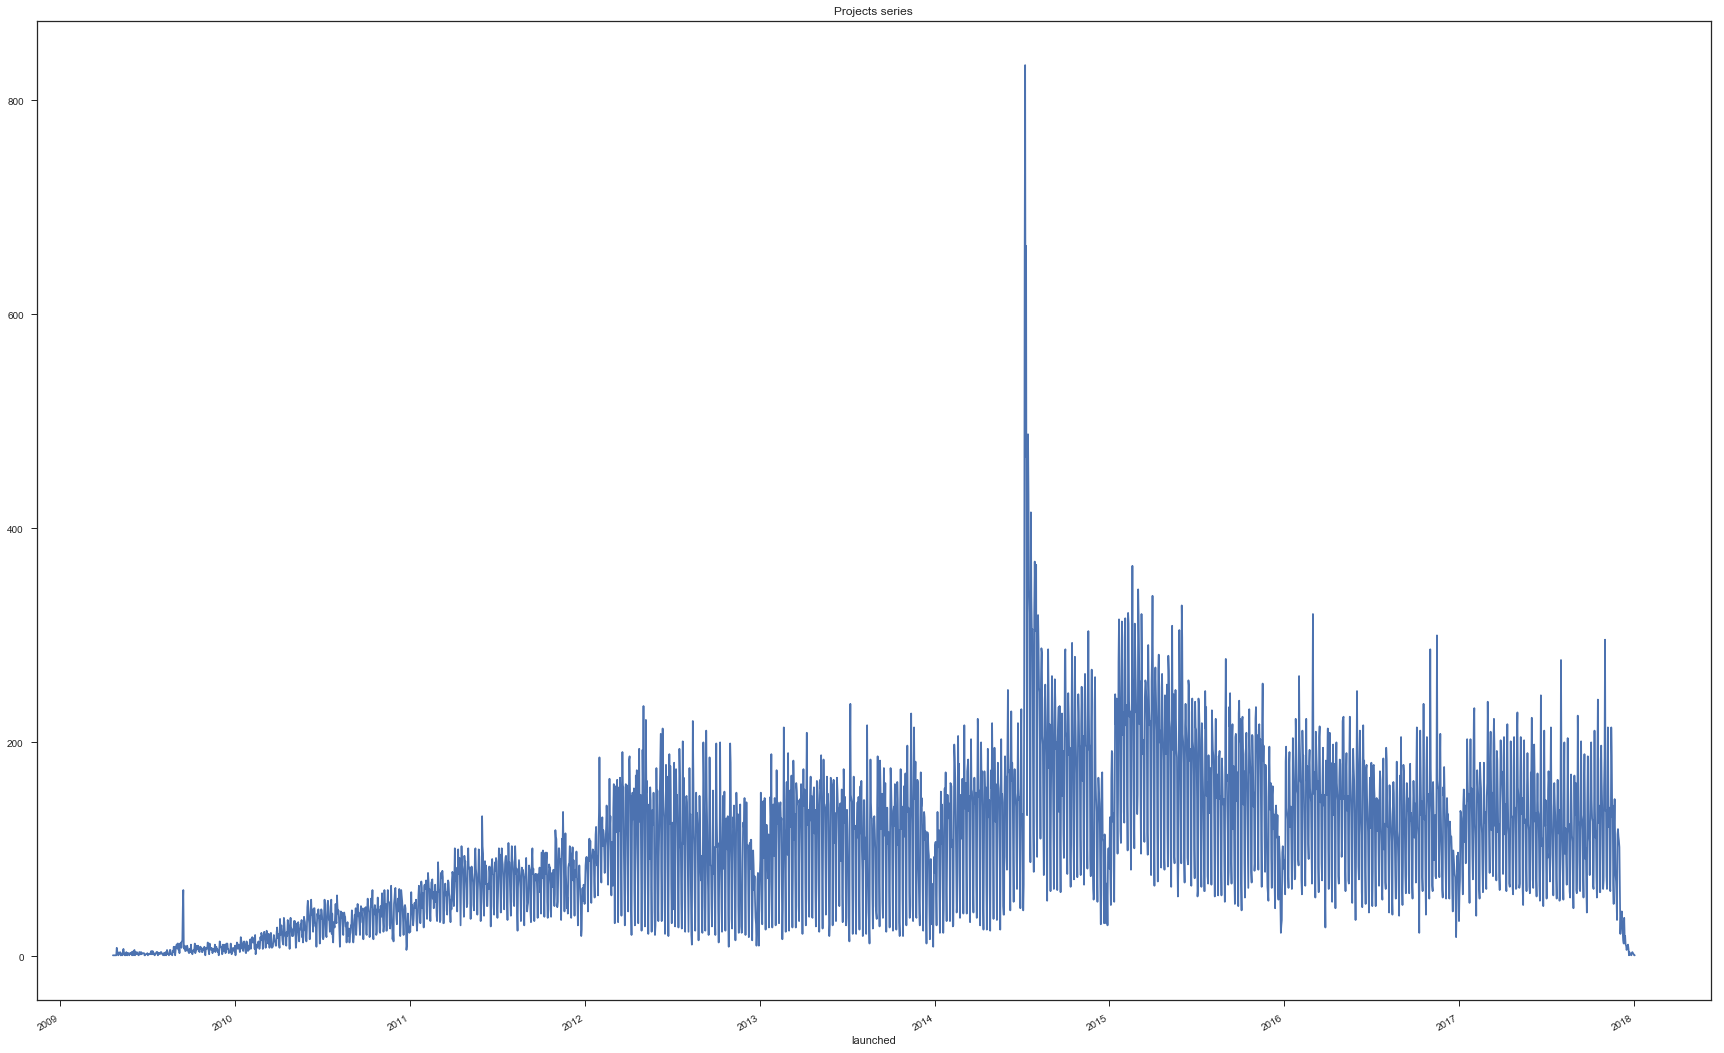

In [68]:
# let's plot the series
timeAnalysisKS.countProj.plot(title="Projects series", figsize=(30,20))


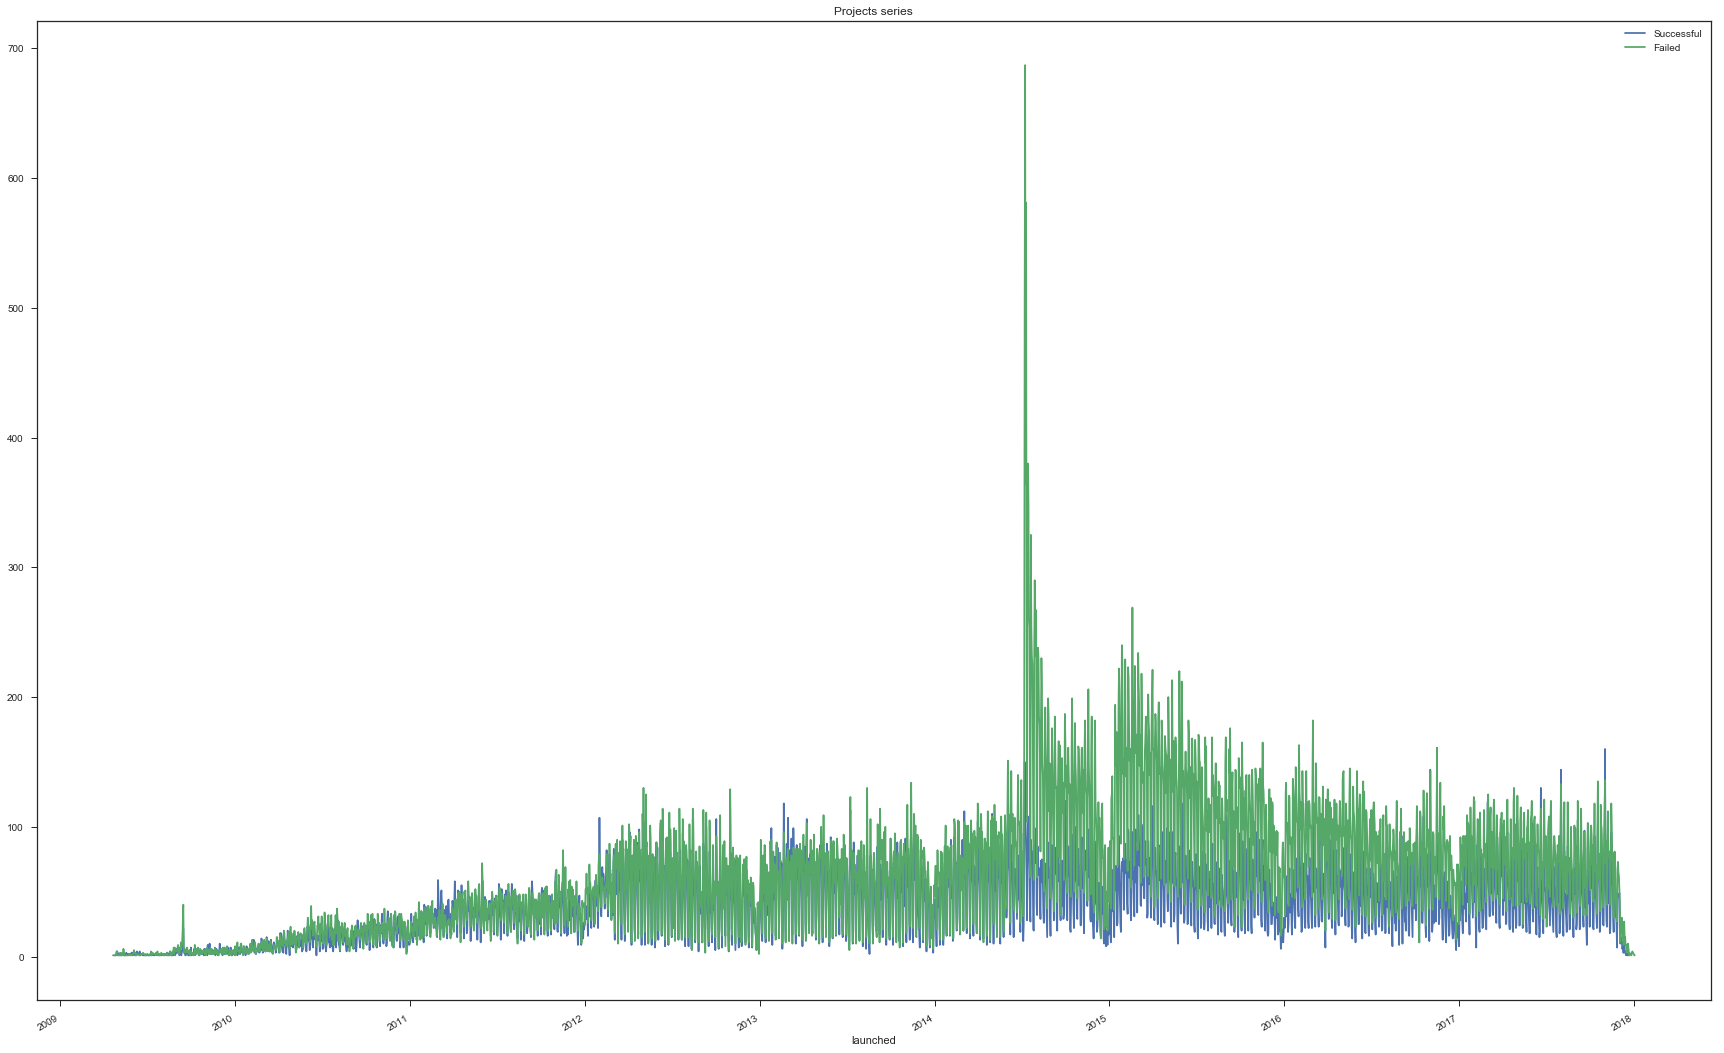

In [69]:
timeAnalysisKSSuccess.countProj.plot(title="Projects series", figsize=(30,20), label="Successful")
timeAnalysisKSFail.countProj.plot(title="Projects series", figsize=(30,20), label="Failed")
plt.legend(loc="upper right")


We can see an interesting peak in late 2014. Also in every beginning of every year, the number of projects seem to be particularly low. We need to resample this, as there
are too many datapoints.

The resample method in pandas is similar to its groupby method as you are essentially grouping by a certain time span. You then specify a method of how you would like to resample. (http://benalexkeen.com/resampling-time-series-data-with-pandas/)

In [70]:
# resampling
week_timeAnalysisKS = pd.DataFrame()
week_timeAnalysisKS["countProj"] = timeAnalysisKS.countProj.resample("W").mean()
week_timeAnalysisKS["goal_per_day"] = timeAnalysisKS.goal_per_day.resample("W").mean()

week_timeAnalysisKSSuccess = pd.DataFrame()
week_timeAnalysisKSSuccess["countProj"] = timeAnalysisKSSuccess.countProj.resample("W").mean()
week_timeAnalysisKSSuccess["goal_per_day"] = timeAnalysisKSSuccess.goal_per_day.resample("W").mean()

week_timeAnalysisKSFail = pd.DataFrame()
week_timeAnalysisKSFail["countProj"] = timeAnalysisKSFail.countProj.resample("W").mean()
week_timeAnalysisKSFail["goal_per_day"] = timeAnalysisKSFail.goal_per_day.resample("W").mean()

In [71]:
data = [go.Scatter(
          x=timeAnalysisKS.index,
          y=timeAnalysisKS.countProj)]

data2 = [go.Scatter(
          x=week_timeAnalysisKS.index,
          y=week_timeAnalysisKS.countProj)]

In [72]:
layout = dict(
    title='',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

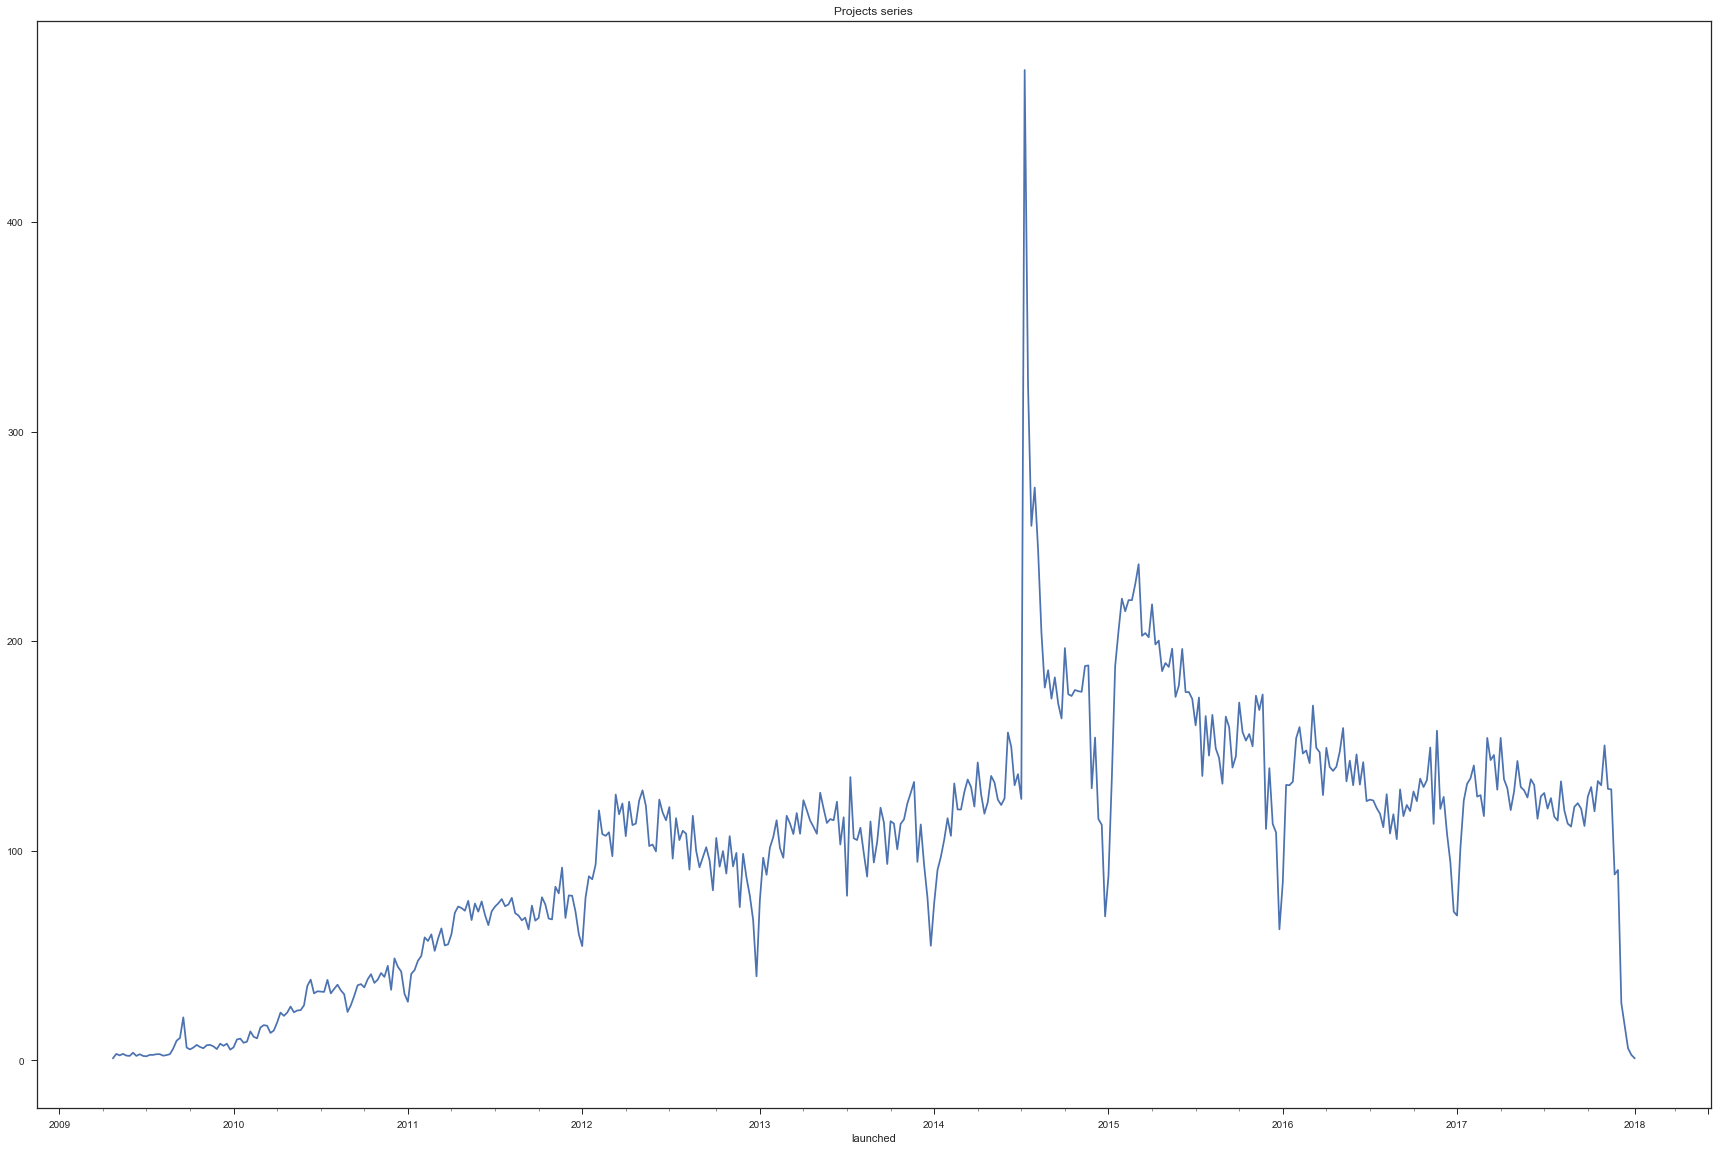

In [73]:
week_timeAnalysisKS.countProj.plot(title="Projects series", figsize=(30,20))


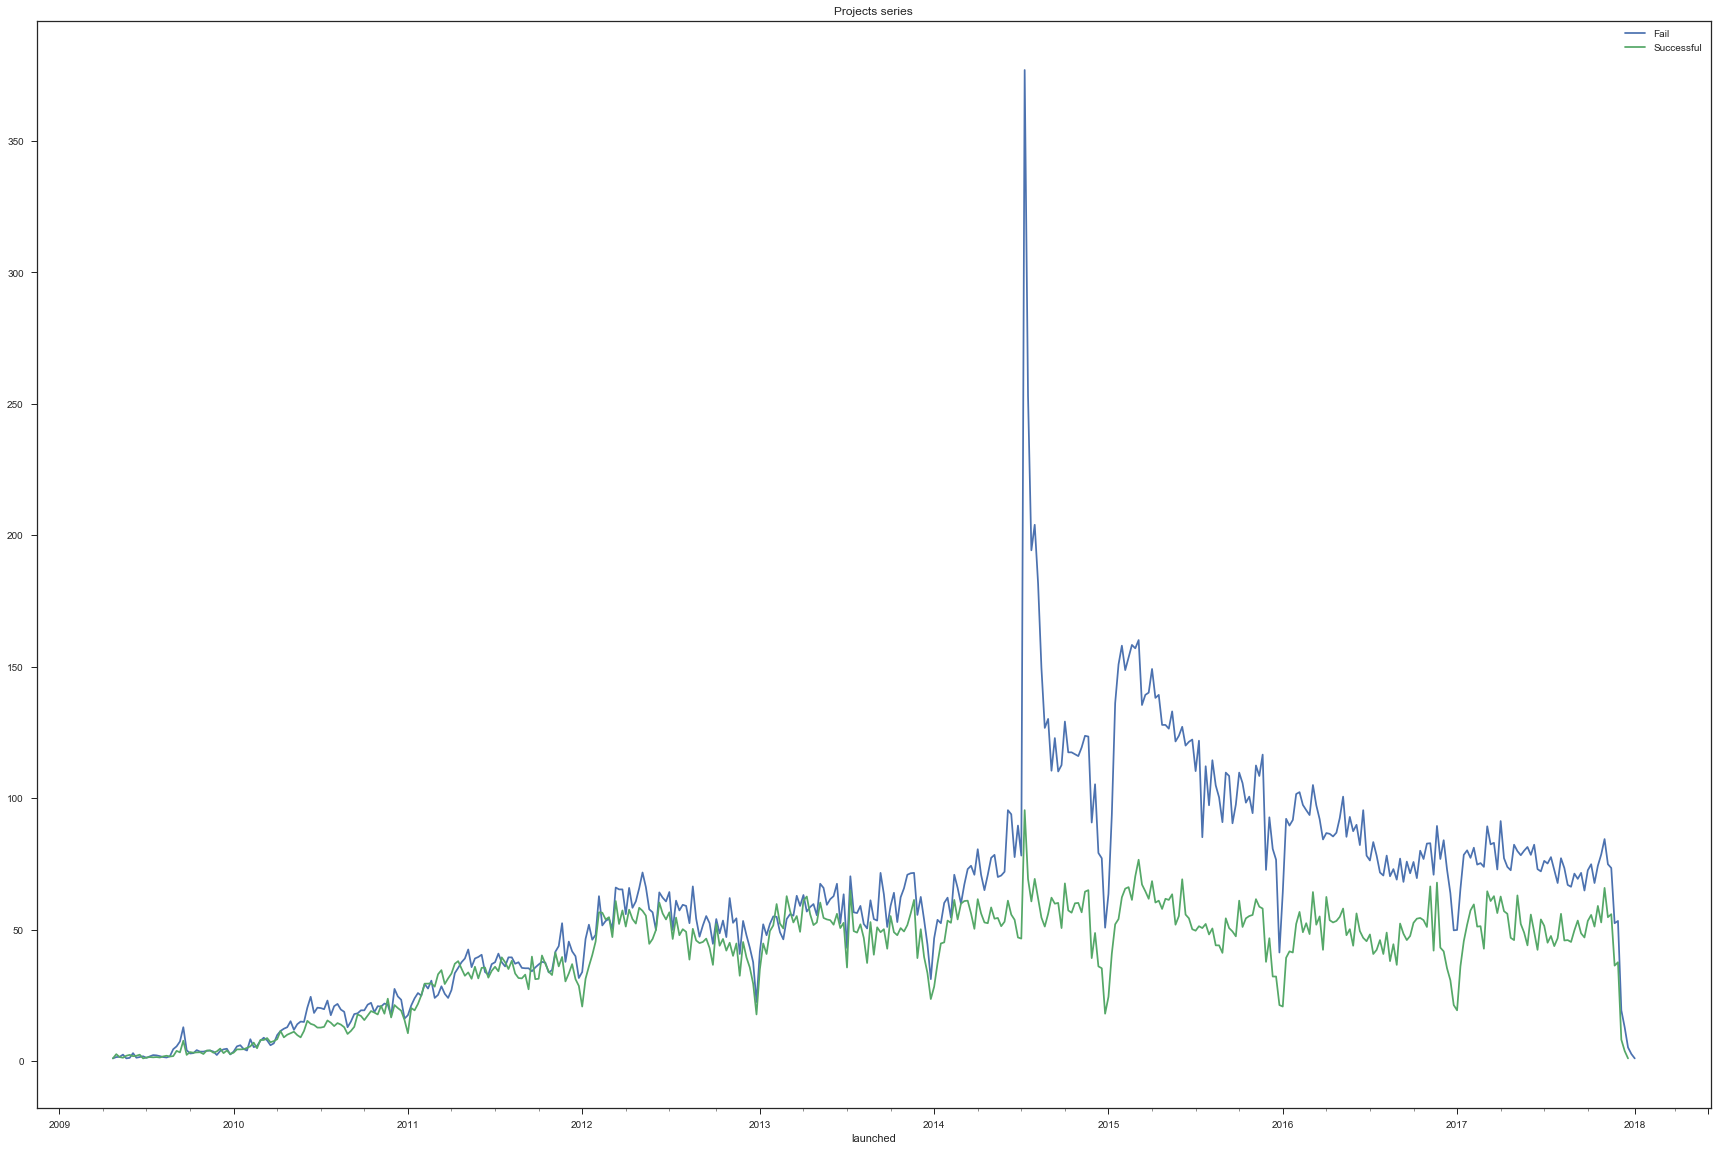

In [74]:
week_timeAnalysisKSFail.countProj.plot(title="Projects series", figsize=(30,20),label="Fail")
week_timeAnalysisKSSuccess.countProj.plot(title="Projects series", figsize=(30,20),label="Successful")
plt.legend(loc="upper right")


In [75]:
# Let's look at how the success rate change over time!
mainKS2=pd.get_dummies(mainKS, columns=["state"])


def divide_two_cols(df_sub):
    return df_sub['state_successful'].sum() / float(df_sub['state_failed'].sum()+df_sub['state_successful'].sum() )

timeAnalysisKSSuccessRate= mainKS2.groupby('launched').apply(divide_two_cols)

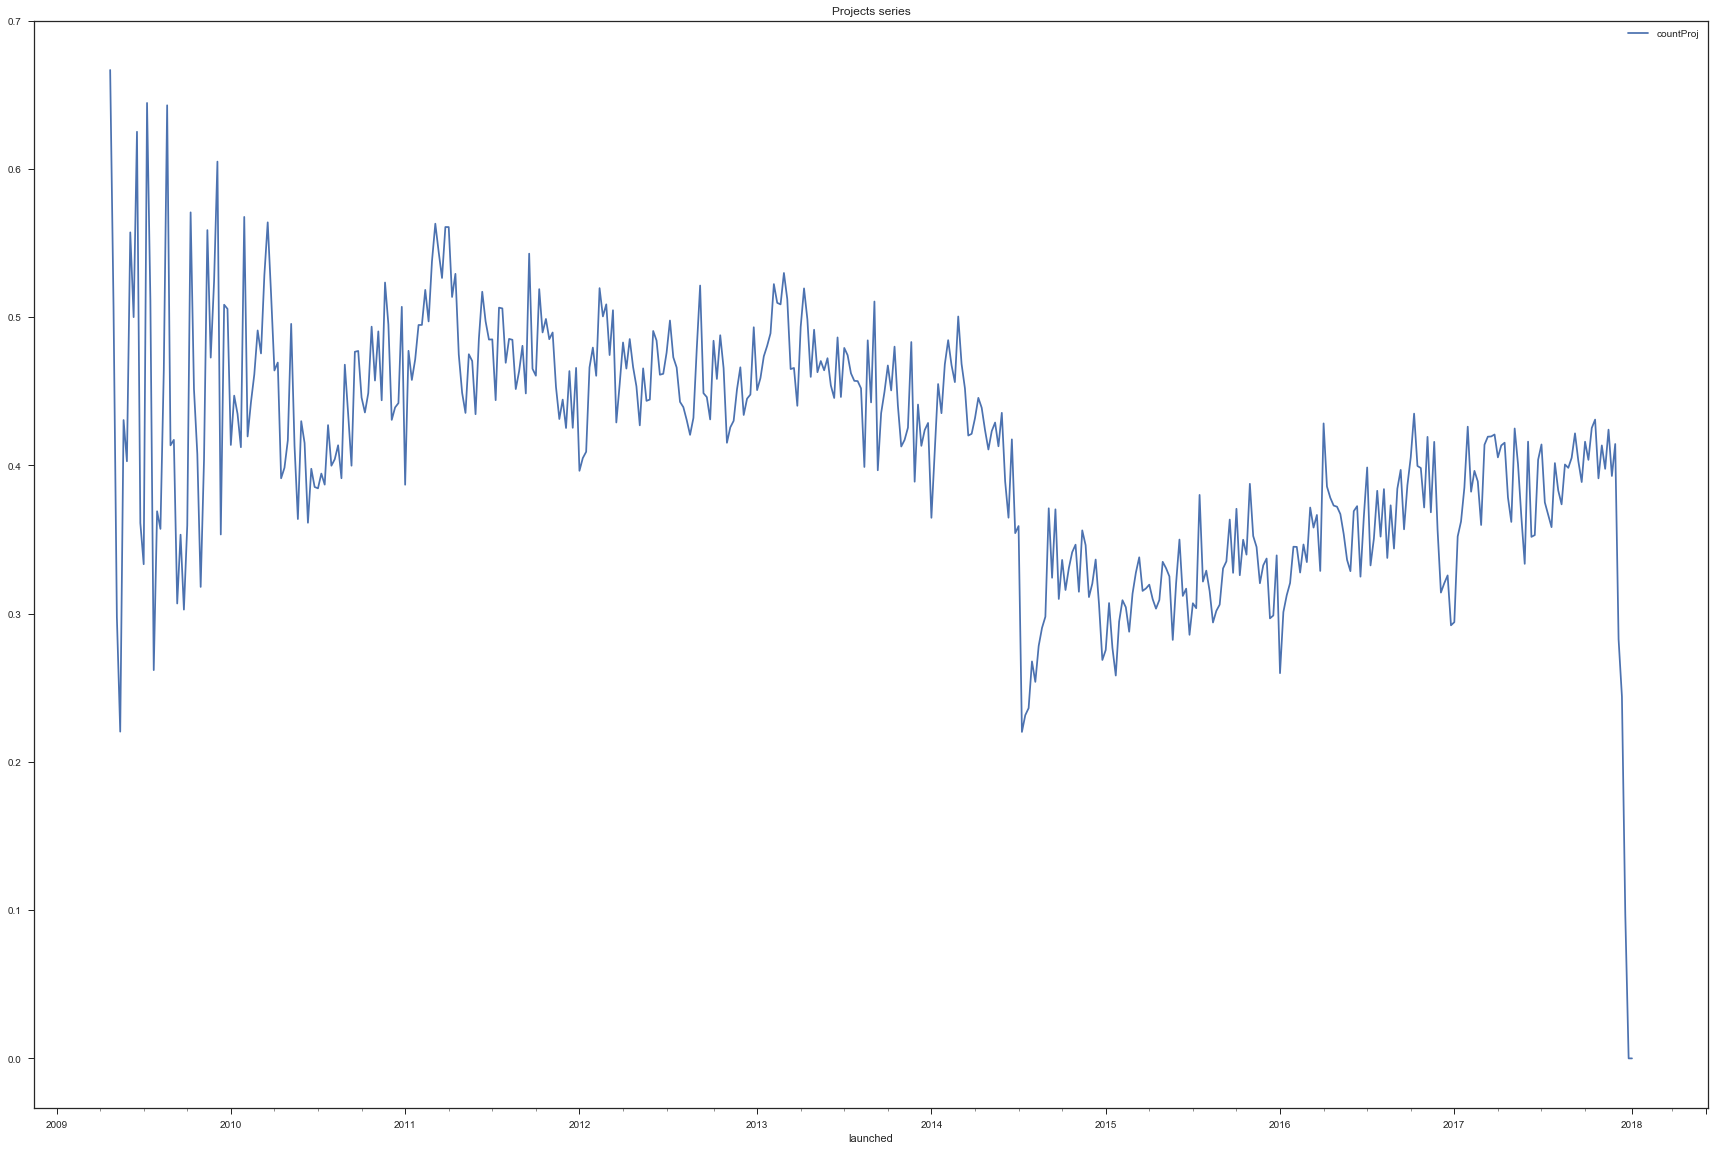

In [76]:
week_timeAnalysisKSSuccessRate = pd.DataFrame()
week_timeAnalysisKSSuccessRate["countProj"] = timeAnalysisKSSuccessRate.resample("W").mean()
# week_timeAnalysisKSSuccessRate["goal_per_day"] = timeAnalysisKSSuccessRate.goal_per_day.resample("W").mean()

week_timeAnalysisKSSuccessRate.plot(title="Projects series", figsize=(30,20))


In [77]:
# let's plot the weekly sampled dataset, this time using plotly
plotly.offline.init_notebook_mode(connected=True)

fig = dict(data=data2, layout=layout)
plotly.offline.iplot(fig, filename = "Time Series Count of Projects")

## Time Series decomposition
We want to disassemble our time series into individual components.
first we want to look at the trend:
 One popular way is by taking a rolling average, which means that, for each time point, you take the average of the points on either side of it. 
 
What happens then because you take the average is it tends to smooth out noise and seasonality. 

In [78]:
week_timeAnalysisKS_trend = week_timeAnalysisKS[['countProj']].rolling(12).mean()
# week_timeAnalysisKS_trend.rolling(12).mean().plot(figsize=(20,10), fontsize=20)
# plt.title("Trend")
trend = [go.Scatter(
          x=week_timeAnalysisKS_trend.index,
          y=week_timeAnalysisKS_trend.countProj)]

fig = dict(data=trend, layout=layout)
plotly.offline.iplot(fig, filename = "Time Series Trend")

Trend for Successful and Failed Projects - Are there differences?

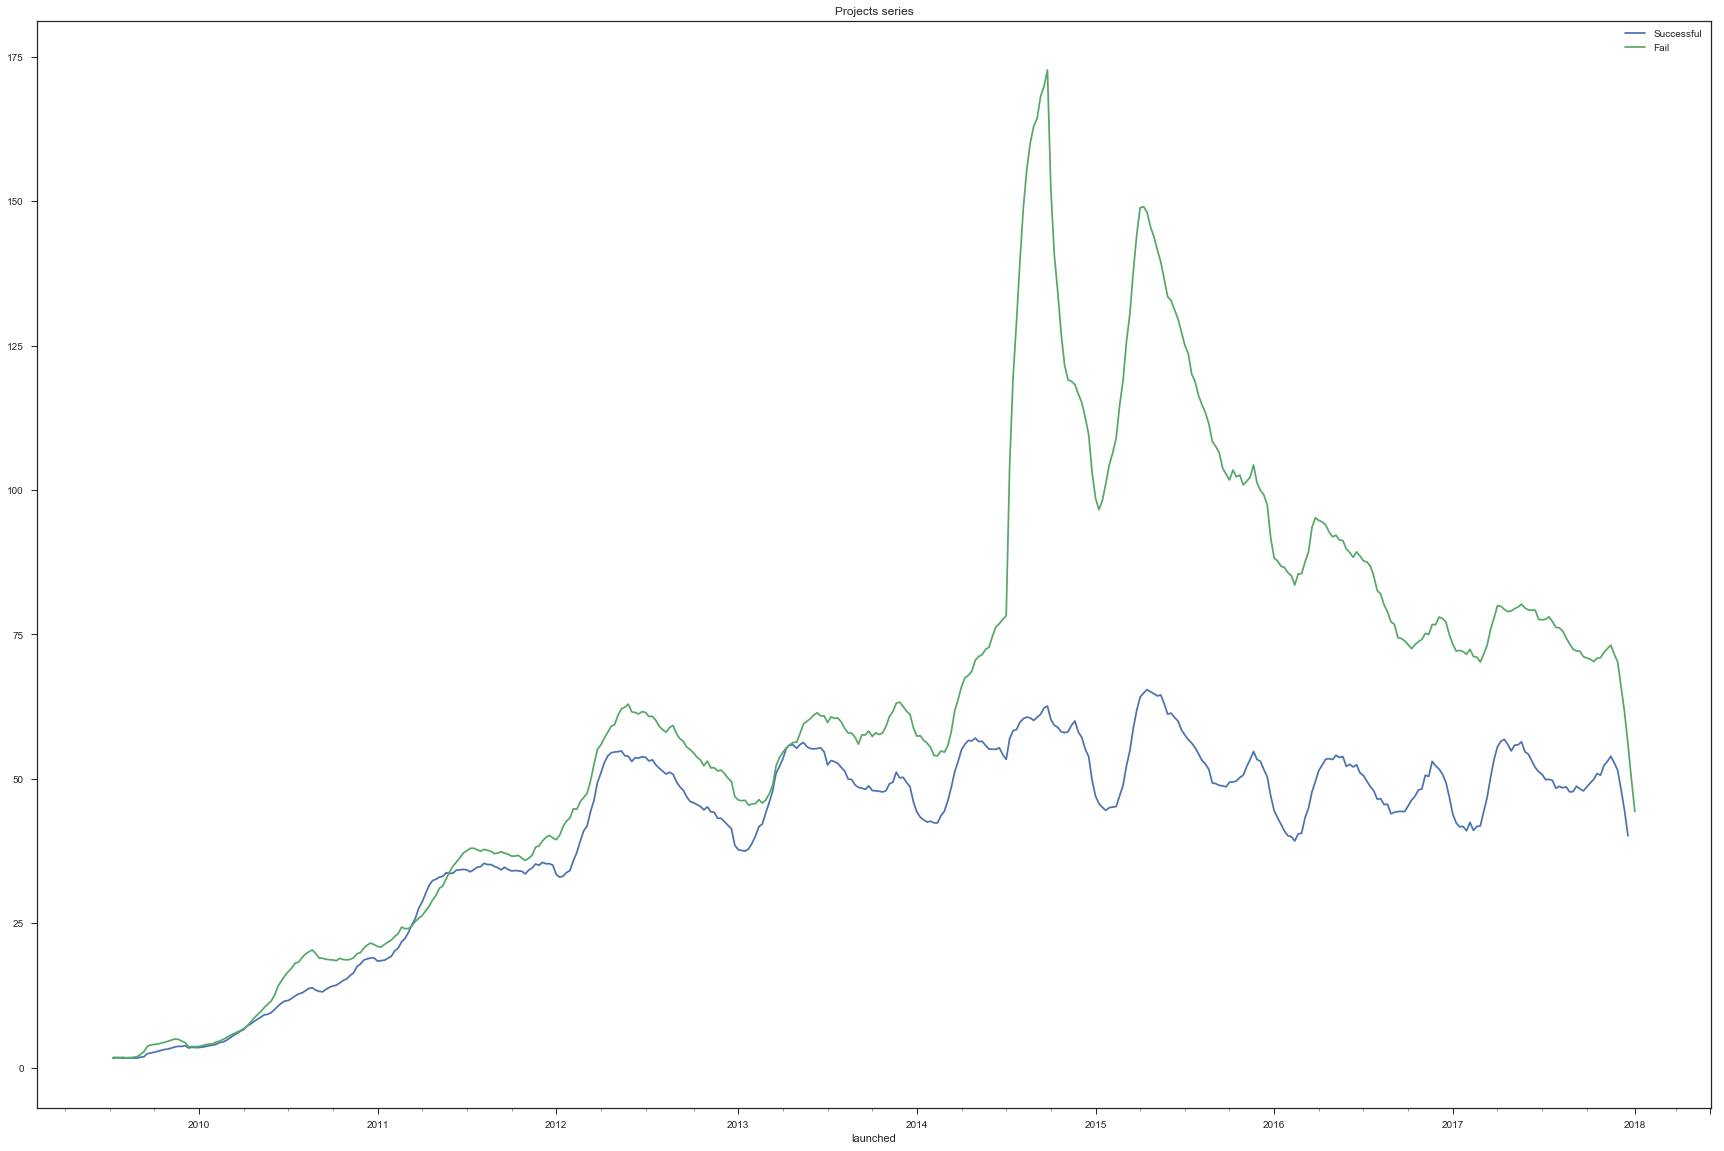

In [79]:
week_timeAnalysisKS_trend_success = week_timeAnalysisKSSuccess[['countProj']].rolling(12).mean()
week_timeAnalysisKS_trend_fail = week_timeAnalysisKSFail[['countProj']].rolling(12).mean()

week_timeAnalysisKS_trend_success.countProj.plot(title="Projects series", figsize=(30,20),label="Successful")
week_timeAnalysisKS_trend_fail.countProj.plot(title="Projects series", figsize=(30,20),label="Fail")
plt.legend(loc="upper right")

Next we want to look at is seasonality. 
Seasonal Patterns in Time Series Data One way to think about the seasonal components to the time series of your data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over.

Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

https://www.otexts.org/fpp/8/1

In [80]:
trend = [go.Scatter(
          x=week_timeAnalysisKS.index,
          y=week_timeAnalysisKS.countProj)]


week_timeAnalysisKS_seasonality = week_timeAnalysisKS[['countProj']].diff()
seasonality = [go.Scatter(
          x=week_timeAnalysisKS_seasonality.index,
          y=week_timeAnalysisKS_seasonality.countProj)]

fig = dict(data=seasonality, layout=layout)
plotly.offline.iplot(fig, filename = "Time Series Seasonality")

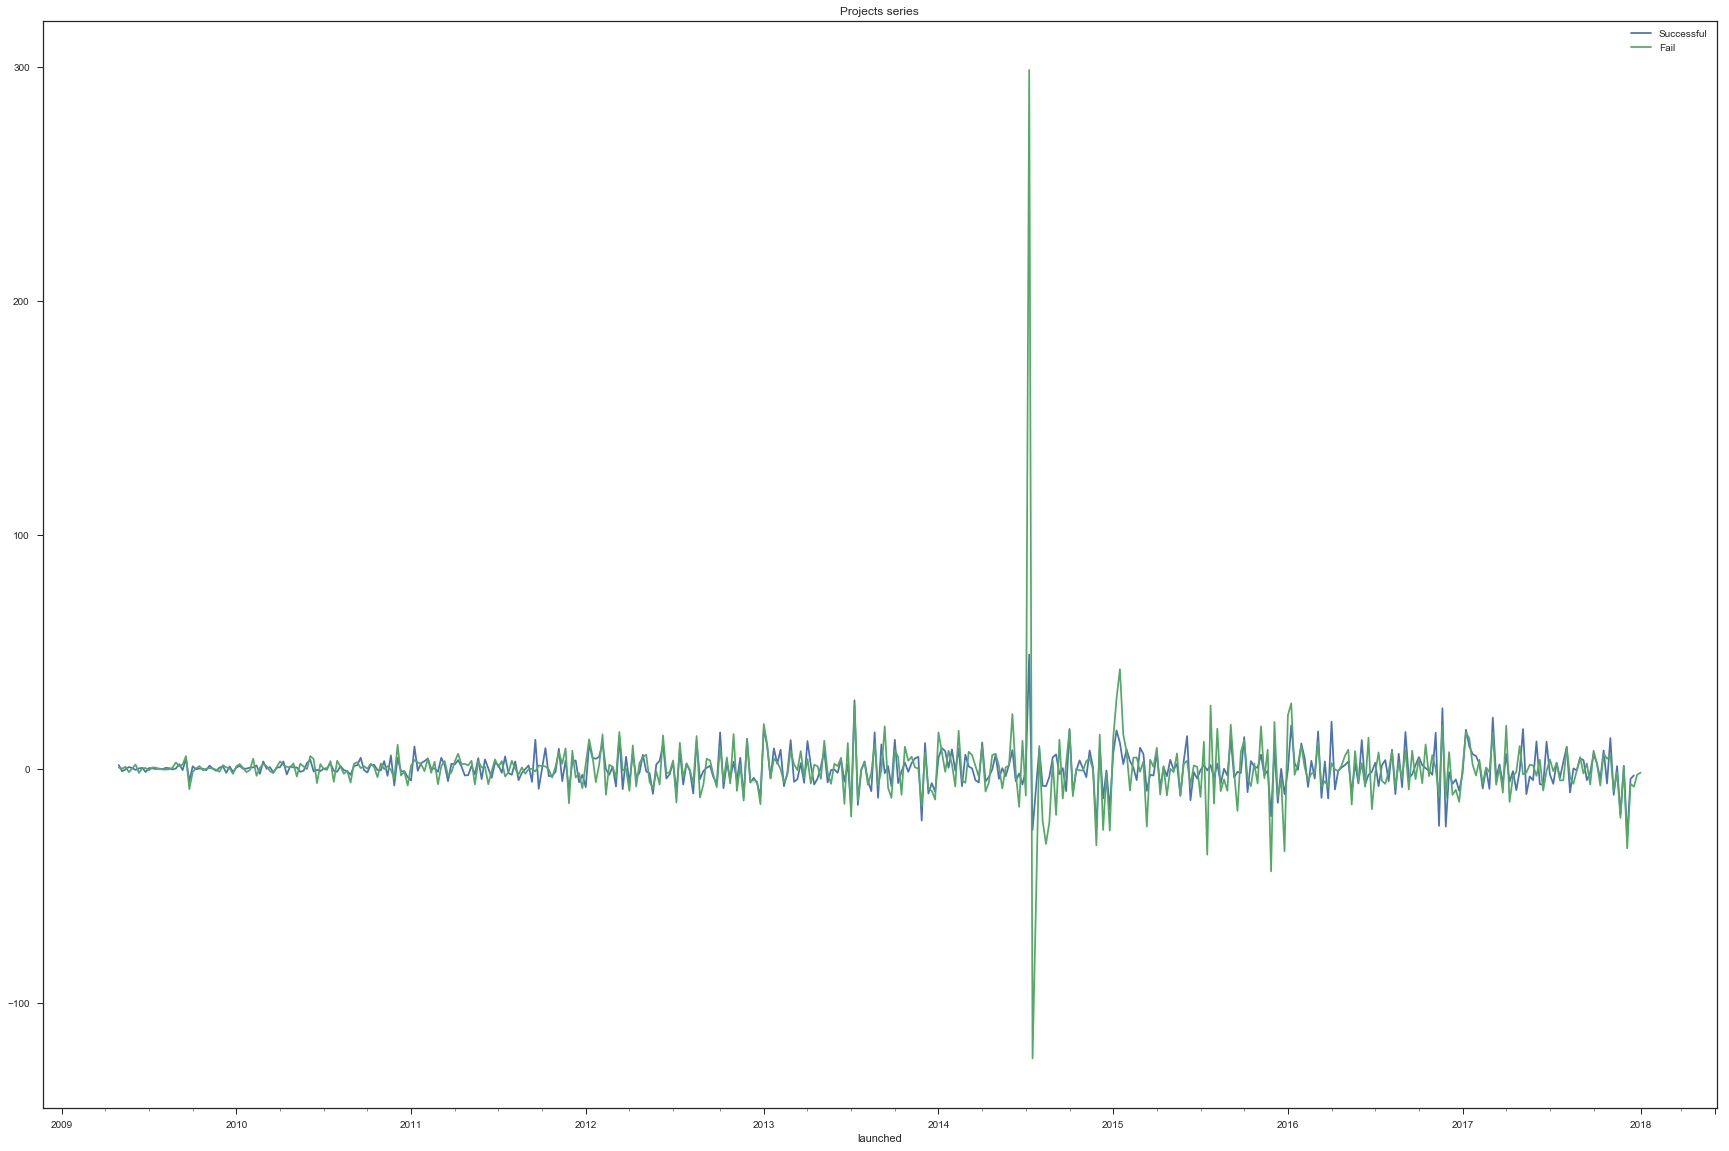

In [81]:
week_timeAnalysisKS_seasonality_success = week_timeAnalysisKSSuccess[['countProj']].diff()
week_timeAnalysisKS_seasonality_fail = week_timeAnalysisKSFail[['countProj']].diff()

week_timeAnalysisKS_seasonality_success.countProj.plot(title="Projects series", figsize=(30,20),label="Successful")
week_timeAnalysisKS_seasonality_fail.countProj.plot(title="Projects series", figsize=(30,20),label="Fail")
plt.legend(loc="upper right")


Next is to look at the autocorrelation

C:\Users\hammerej\AppData\Local\Continuum\Anaconda3\envs\condatascience\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.



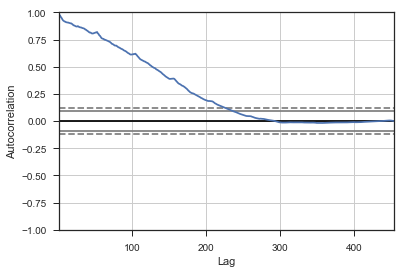

In [82]:

autocorrelation_plot(week_timeAnalysisKS)
plt.show()